# Predicting Concrete Compression Strength using Regression Models

### *Comparison of Linear, Polynomial and Non-parametric Regression Models on Performance*

- Submitted by: Kovendhan V
- PGP.AIML.O.JUN20B.Group4

**Data Description:**

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

**Domain:**
Cement manufacturing

**Context:**

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

**Attribute Information:**

- Cement : measured in kg in a m3 mixture
- Blast : measured in kg in a m3 mixture
- Fly ash : measured in kg in a m3 mixture
- Water : measured in kg in a m3 mixture
- Superplasticizer : measured in kg in a m3 mixture
- Coarse Aggregate : measured in kg in a m3 mixture
- Fine Aggregate : measured in kg in a m3 mixture
- Age : day (1~365)
- Concrete compressive strength measured in MPa

**Learning Outcomes:**

- Exploratory Data Analysis
- Building ML models for regression
- Hyper parameter tuning

## Step 1: Import the necessary Libraries

In [ ]:
#Numerical Calculations
import numpy as np 
import pandas as pd
from scipy.stats import norm, shapiro, zscore

#Data Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
plt.style.use('ggplot')
import seaborn as sns
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn import set_config
set_config(display='diagram')

#Train, Validation and Test set preparation
from sklearn.model_selection import train_test_split

#Feature Engineering and Data Preprocessing
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

#Feature Selection
from sklearn.feature_selection import SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

#Model Selection
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.model_selection import GridSearchCV, KFold, ShuffleSplit, cross_val_score

#Unsupervised Learning Techniques
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import pdist, cdist
from sklearn.metrics import silhouette_score, silhouette_samples

#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Model Building - Regressors
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR

#Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlxtend.evaluate import paired_ttest_5x2cv

#Misc
import os
import warnings
warnings.filterwarnings('ignore')
random_state = 24

## Step 2: Load the dataset

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#os.chdir('/content/drive/My Drive/Colab Notebooks/GL Projects Portfolio/Project 5 - Featurization Model Selection and Tuning')
concrete = pd.read_csv('concrete.csv')
concrete.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

Checking the shape of the dataset

In [ ]:
print('No of Rows : ', concrete.shape[0])
print('No of Columns : ', concrete.shape[1])

No of Rows :  1030
No of Columns :  9


Checking the datatypes and null records

In [ ]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Checking total number of Null values in the dataset

In [ ]:
concrete.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

Checking if the dataset has only Numeric Data

In [ ]:
concrete.applymap(np.isreal).all()

cement          True
slag            True
ash             True
water           True
superplastic    True
coarseagg       True
fineagg         True
age             True
strength        True
dtype: bool

**Observations:**
- There are no missing values. 
- All the variables are numeric datatypes.

## Step 3: Statistical Summary (Five Number Summary) of the Dataset

In [ ]:
concrete.describe().T

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

**Observations:**
- Except for `age`, all other predictor features are of same scale measured in kg/m^3.
- `age` is measured in Number of days whereas `strength` is measured in MPa.
- `slag` and `ash` has skewed distributions with no values within the 25%, 50% quantiles. Distribution is also sparse considering the mean value of 73 and 54 respectively against corresponding Standard Deviations of 86 and 63 respectively. SD>Mean shows that the variance is skewed towards one of the tails.
- `superplastic` also is having skewed distribution with no values in 1st and 2d quantiles.
- `water` seems to be well distributed with values in all the quantiles & considering the min and max ranges.
- `age` is a discrete variable with values ranging from 1 to 365 days (max one year). Hence scaling would be required prior to Model Building.
- `strength` is also distributed with sufficient representation in all the quantiles.


## Step 4: Exploratory Data Analysis (Univariate & Multivariate)

### Univariate Analysis

In [ ]:
def plot_univariate_features(df):
    """
    Helper function to plot Univariate features.
    Input : Dataframe; Output : All Univariate plots for both Numeric and Categorical variables. 
    """
    print("Integer Columns = ",df.select_dtypes(include=['int32','int64']).columns)
    print("Floating Point Columns = ",df.select_dtypes(include=['float64']).columns)
    print("Object Columns = ",df.select_dtypes(include=['object']).columns)
    print("Category Columns = ",df.select_dtypes(include=['category']).columns)
    
    #sns.set_style(style='darkgrid')
    int_cols = pd.Series(df.select_dtypes(include=['int32','int64']).columns)
    for j in range(0,len(int_cols)):
        f, axes = plt.subplots(1, 2, figsize=(10, 10))
        sns.boxplot(df[int_cols[j]], ax = axes[0], palette='Greens_r')
        sns.distplot(df[int_cols[j]], ax = axes[1], fit=norm)
        plt.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

    float_cols = pd.Series(df.select_dtypes(include=['float64']).columns)
    for j in range(0,len(float_cols)):
        plt.Text('Figure for float64')
        f, axes = plt.subplots(1, 2, figsize=(10, 10))
        sns.boxplot(df[float_cols[j]], ax = axes[0], palette='Greens_r')
        sns.distplot(df[float_cols[j]], ax = axes[1], fit=norm)
        plt.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

    obj_cols = pd.Series(df.select_dtypes(include=['object']).columns)
    for j in range(0,len(obj_cols)):
        plt.subplots()
        sns.countplot(df[obj_cols[j]])

Integer Columns =  Index(['age'], dtype='object')
Floating Point Columns =  Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'strength'],
      dtype='object')
Object Columns =  Index([], dtype='object')
Category Columns =  Index([], dtype='object')


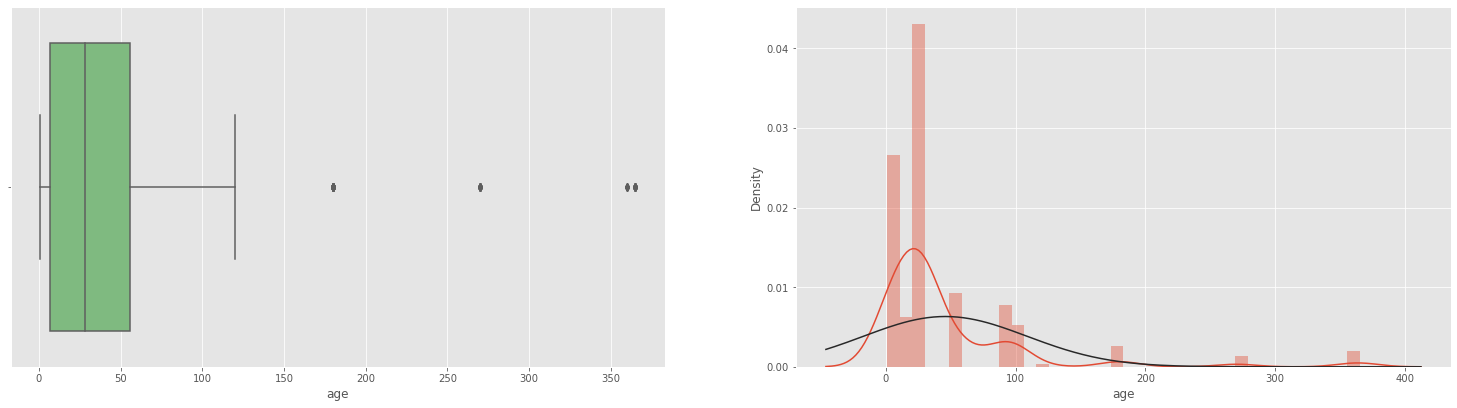

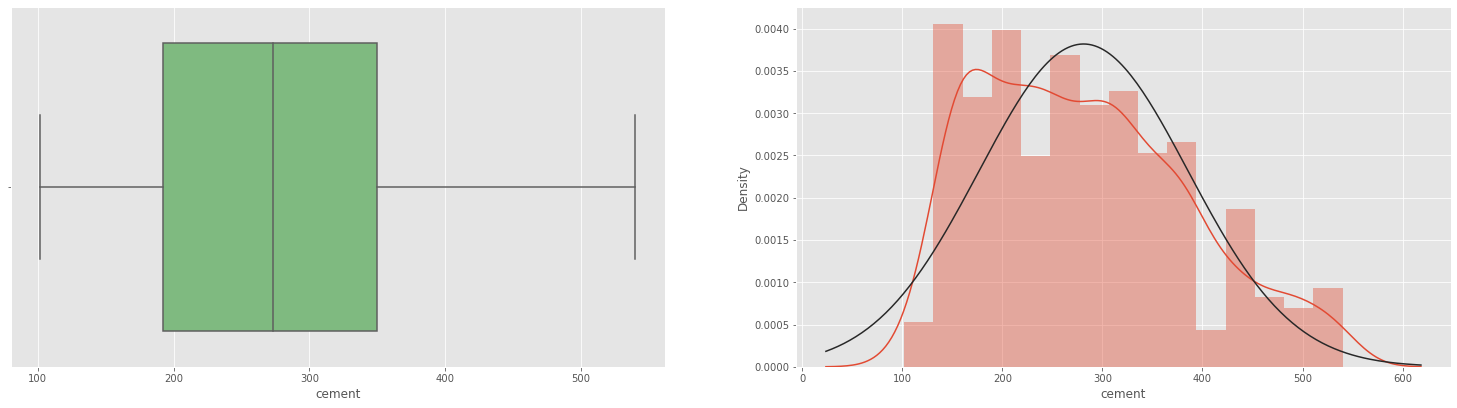

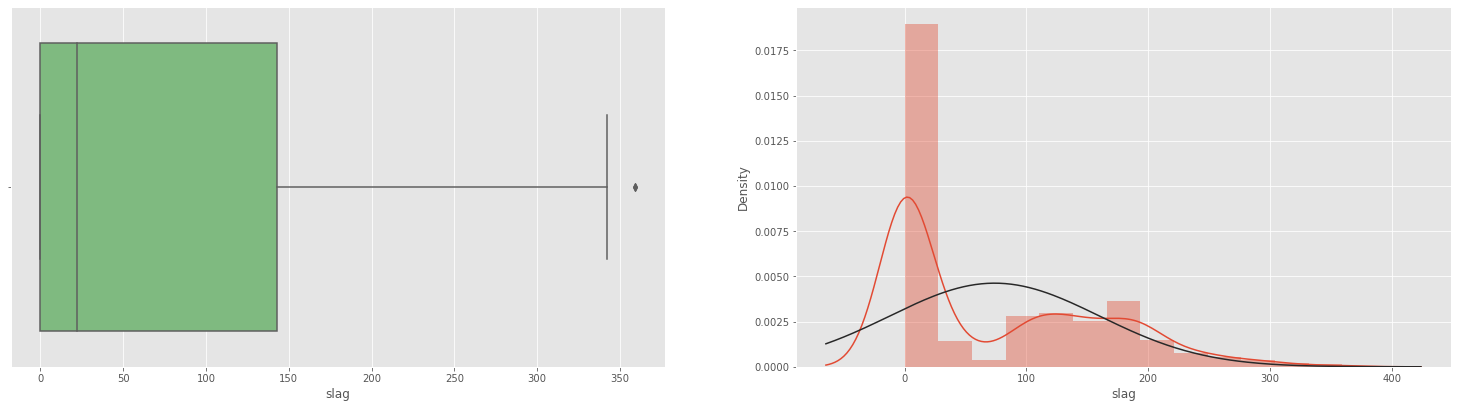

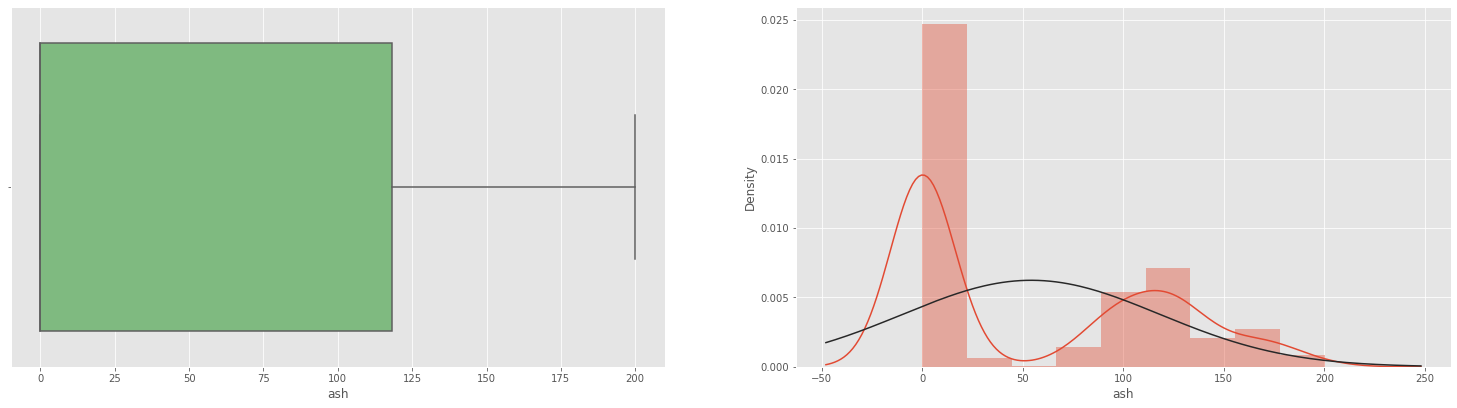

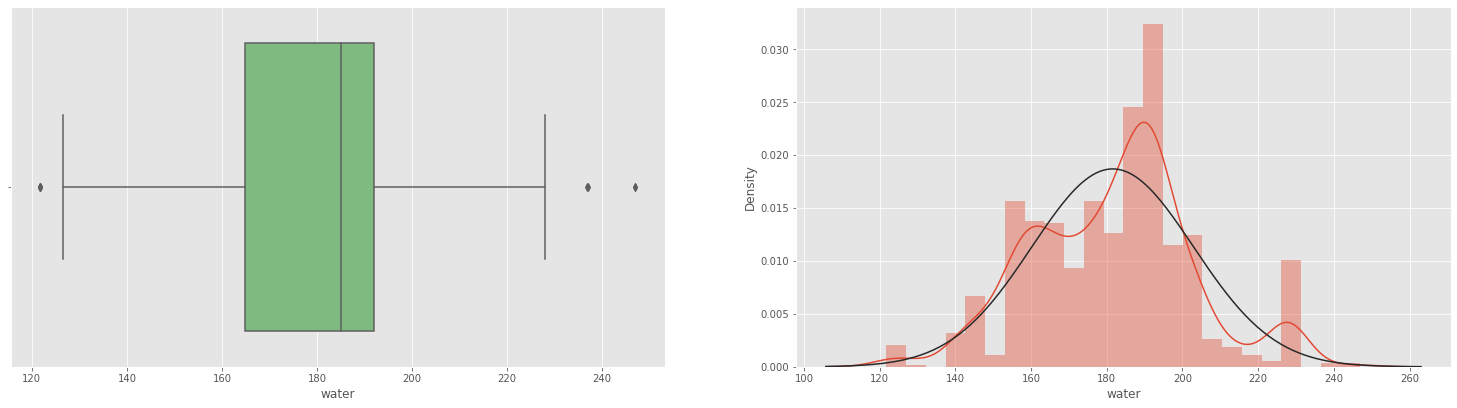

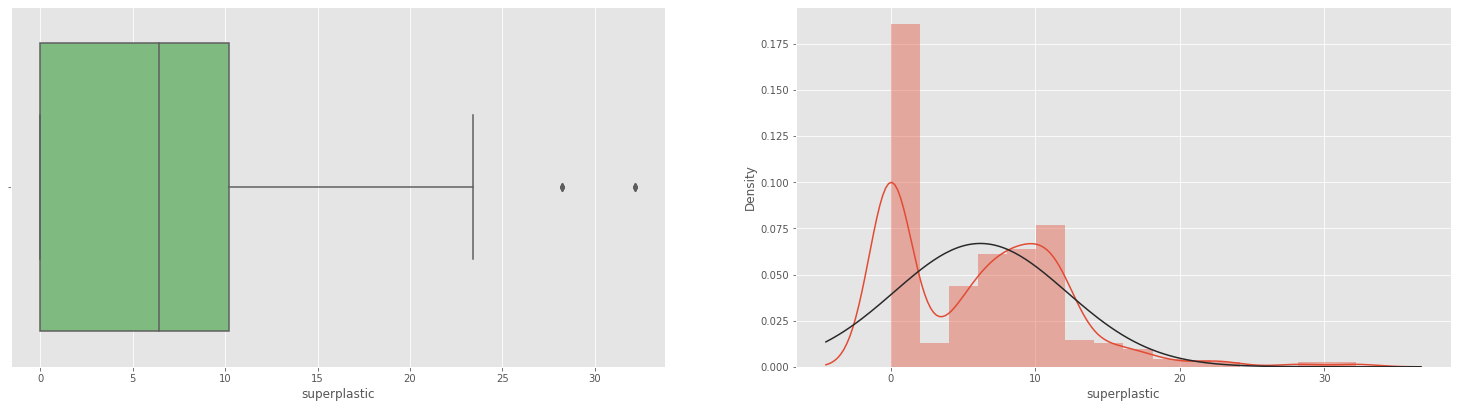

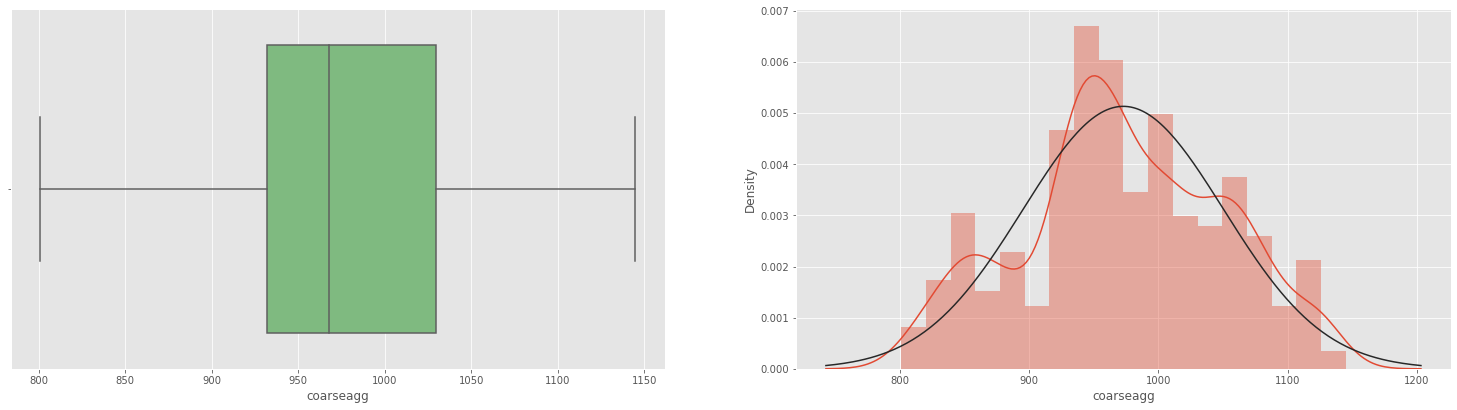

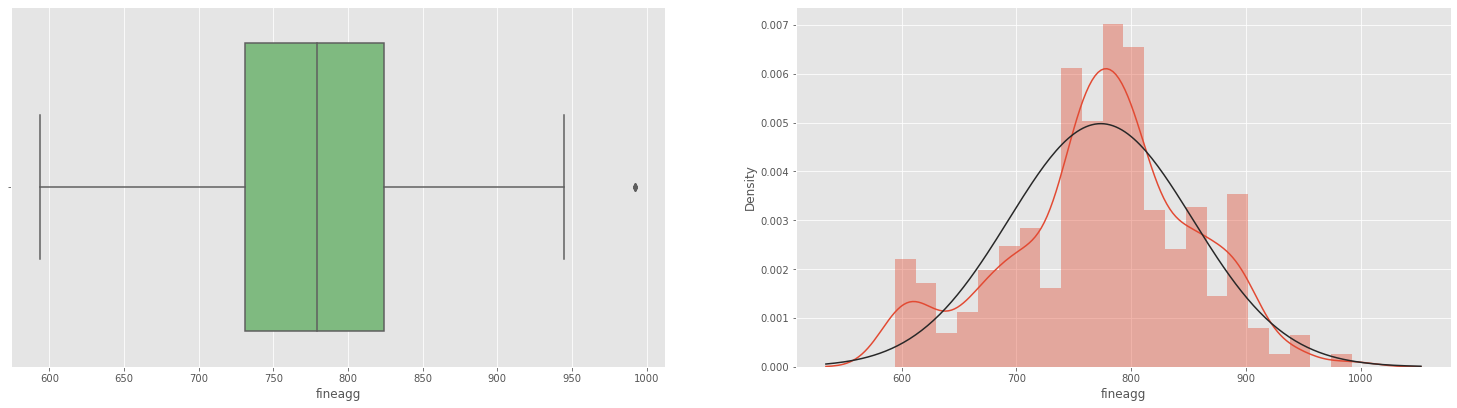

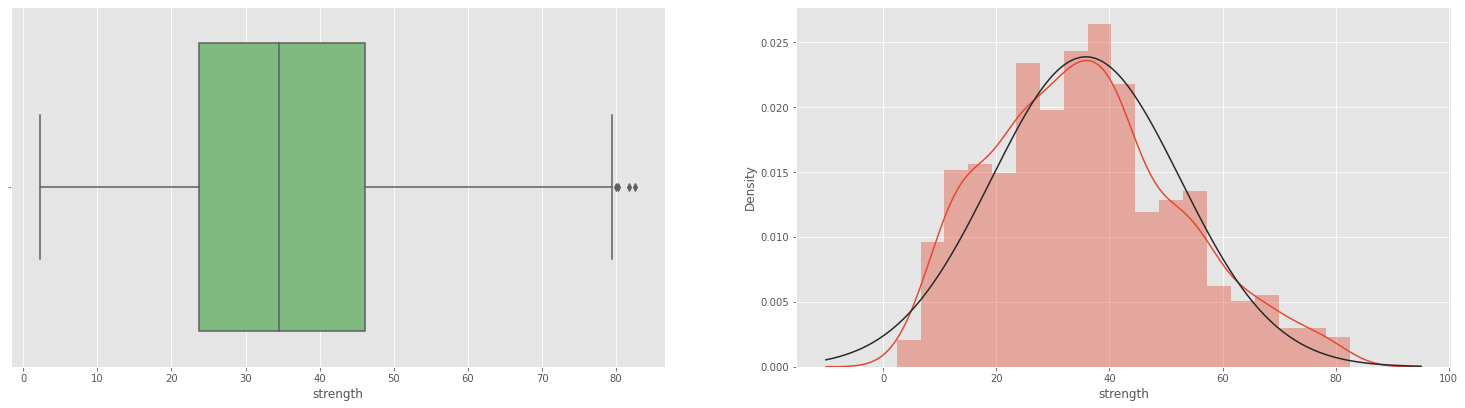

In [ ]:
plot_univariate_features(concrete)

**Observations:**
- 'age' variable has outliers, however it is a discrete variable and hence it will not be meaningful if we impute the outliers, rather than it is advisable to prepare a model that will handle outliers instrinsically or do binning during Feature Engineering.
- `cement`, `ash`, `coarseagg` variables do not have any outliers.
- `slag`, `ash` and `superplastic` variables have strong right skewness. Hence it would be advisable to do Feature Transformation such as Log Transform / Quantile Transform during prior to Model Building.
- `slag`, `ash` and `superplastic` variables also has several 0 values in its distribution. It is not advisable to impute them without having additional business justification. In this project, we will not impute them and keep them as it is.
- Multi-modal distribution is observed in most of the variables - especially on `cement`, `water`, `ash` and `superplastic` variables. Clustering / Gaussian Mixture models will be helpful here to analyse and understand more about them.
- `strength` variable is almost Normally distributed.

#### Shapiro Test for Normality of Features

In [ ]:
normality_test = lambda x: shapiro(x.fillna(0))[1] < 0.01
normal = concrete
normal = normal.apply(normality_test)
print(~normal)

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool


None of the variables pass Shapiro test for Normality at 0.01 Significance level.

#### Skewness Check

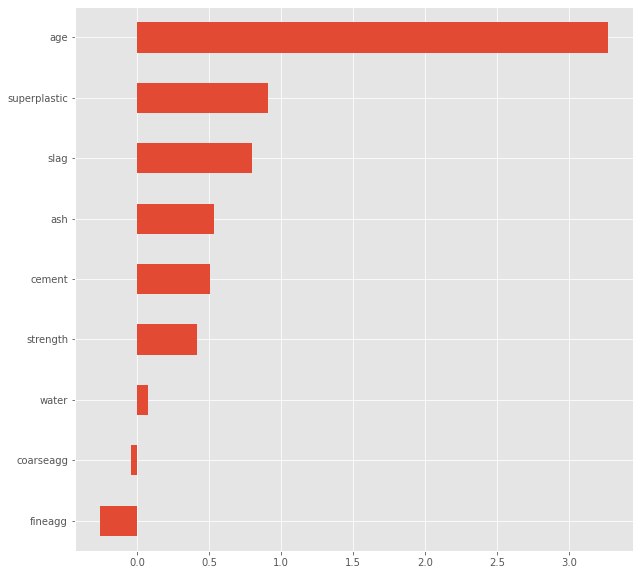

In [ ]:
plt.figure(figsize=(10,10))
concrete.skew().sort_values().plot(kind='barh')
plt.show()

#### Outliers Detection & Treatment

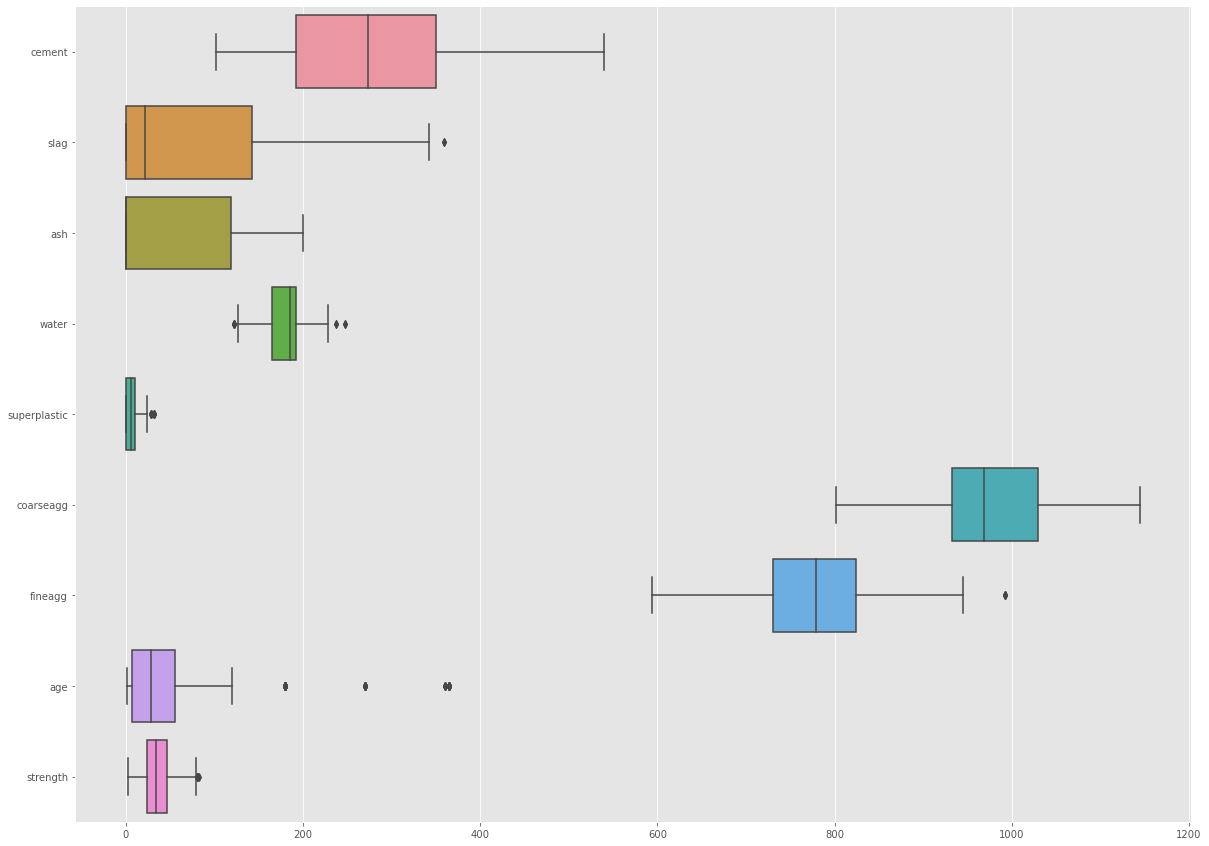

In [ ]:
fig = plt.figure(figsize = (20, 15))
ax = sns.boxplot(data = concrete, orient = 'h')
plt.show()

In [ ]:
def outliers_IQR(df):
  """
  Helper function to detect Outliers in the Dataframe
  Input : Dataframe; Output : Dataframe containing Percentage and Number of Outliers. 
  """
  columns = df.columns
  outliers_list = []
  no_of_outliers = []
  for c in df.columns:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    df_outliers = np.where((df[c] < (Q1 - 1.5 * IQR)) | (df[c] > (Q3 + 1.5 * IQR)))
    no_of_outliers.append(len(df_outliers[0]))
    outliers_list.append(round((len(df_outliers[0]) / len(df[c]) * 100),2))

  print("\n")
  outliers_df = pd.DataFrame({"Percentage_of_Outliers":outliers_list, "No_of_Outliers":no_of_outliers}, index=df.columns)
  return outliers_df.sort_values(by="Percentage_of_Outliers", ascending=False)

In [ ]:
outliers_IQR(concrete)

Percentage_of_Outliers  No_of_Outliers
age                             5.73              59
superplastic                    0.97              10
water                           0.87               9
fineagg                         0.49               5
strength                        0.39               4
slag                            0.19               2
cement                          0.00               0
ash                             0.00               0
coarseagg                       0.00               0

**Observations:**
- `age` has around 6% of the values as outliers, which is significant and also it is a discrete ordinal variable. Hence, imputation would not be done as discussed previously.
- `superplastic`, `water` exhibits around 1% of the data as outliers. 
- As mentioned previously, let us use Algorithms that handle outliers intrinsically (such as Random Forest that handles outliers by binning them). 
- However, in order to minimize the outliers, let us do Feature Transformation (Log / QuantileTransformer) during Featurization.
- We will also use Robust Scaler to minimize the impact of Outliers.

In [ ]:
# Log Transformation of below features would be carried out in Feature Engineering step
outlier_treatment_features = ['superplastic', 'fineagg', 'slag']

#### High Leverage / Influence Points Detection using Cook's Distance

- Cook's Distance measure helps us to identify outliers and high influence data points that has huge influence on the final target variable value.
- Let us use 'Influence Plots' from statsmodels library for visualizing the Influence points (High Leverage).

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm

In [ ]:
X_sm = concrete.iloc[:,0:-1]
y_sm = concrete['strength']

X_sm = sm.add_constant(X_sm) # adding a constant

lr_sm = sm.OLS(y_sm, X_sm).fit()
pred_sm = lr_sm.predict(X_sm) 

print_model = lr_sm.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Sat, 21 Nov 2020   Prob (F-statistic):          6.29e-206
Time:                        22:01:51   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -23.3312     26.586     -0.878   

**Observations:**
- Durbin-Watson:                   1.870
- Cond. No.                     1.06e+05

Both of these will indicate that there is multicollinearity (auto-correlation) among the predictor variables.

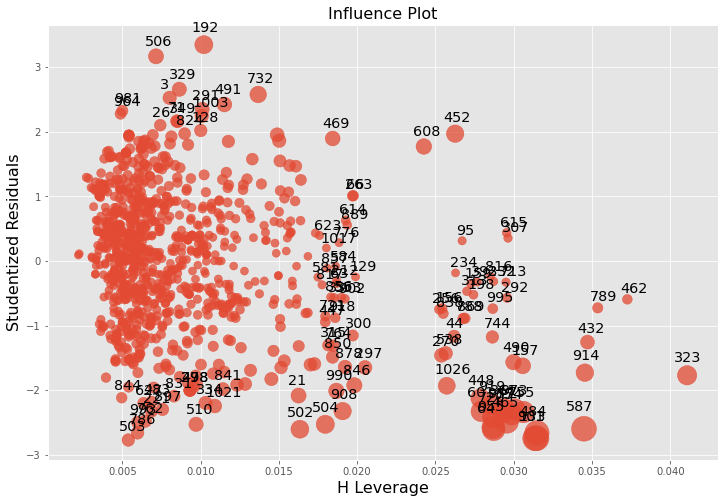

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = influence_plot(lr_sm, ax= ax, criterion="cooks", size=25)

# Cook's Distance is displayed as size of the data points in below plot. 
# Higher the number of large size data points, higher the leverage points.

Setting up a Leverage Cutoff to identify High Leverage points. Usually it is (3k+1)/n where k is No of Columns and n is No of Rows

In [ ]:
leverage_cutoff = 3*((X_sm.shape[1] + 1)/X_sm.shape[0])
print("Leverage Cut-off beyond which points are treated as High Leverage Points are : ", round(leverage_cutoff, 3))

Leverage Cut-off beyond which points are treated as High Leverage Points are :  0.029


In [ ]:
#Let us visualize few of the data points with high Leverage values but with low t-Residual values
X_sm[X_sm.index.isin([323,462,789,432,914,587])]

const  cement   slag    ash  water  superplastic  coarseagg  fineagg  age
323    1.0   139.6  209.4    0.0  192.0           0.0     1047.0    806.9  360
432    1.0   168.0   42.1  163.8  121.8           5.7     1058.7    780.1   28
462    1.0   168.0   42.1  163.8  121.8           5.7     1058.7    780.1  100
587    1.0   168.0   42.1  163.8  121.8           5.7     1058.7    780.1    3
789    1.0   168.0   42.1  163.8  121.8           5.7     1058.7    780.1   56
914    1.0   168.0   42.1  163.8  121.8           5.7     1058.7    780.1   14

Since all of these points have a lower Studentised t-residual value, there is no need to remove them from the dataset. 

### Multivariate Analysis

#### Pair Plot

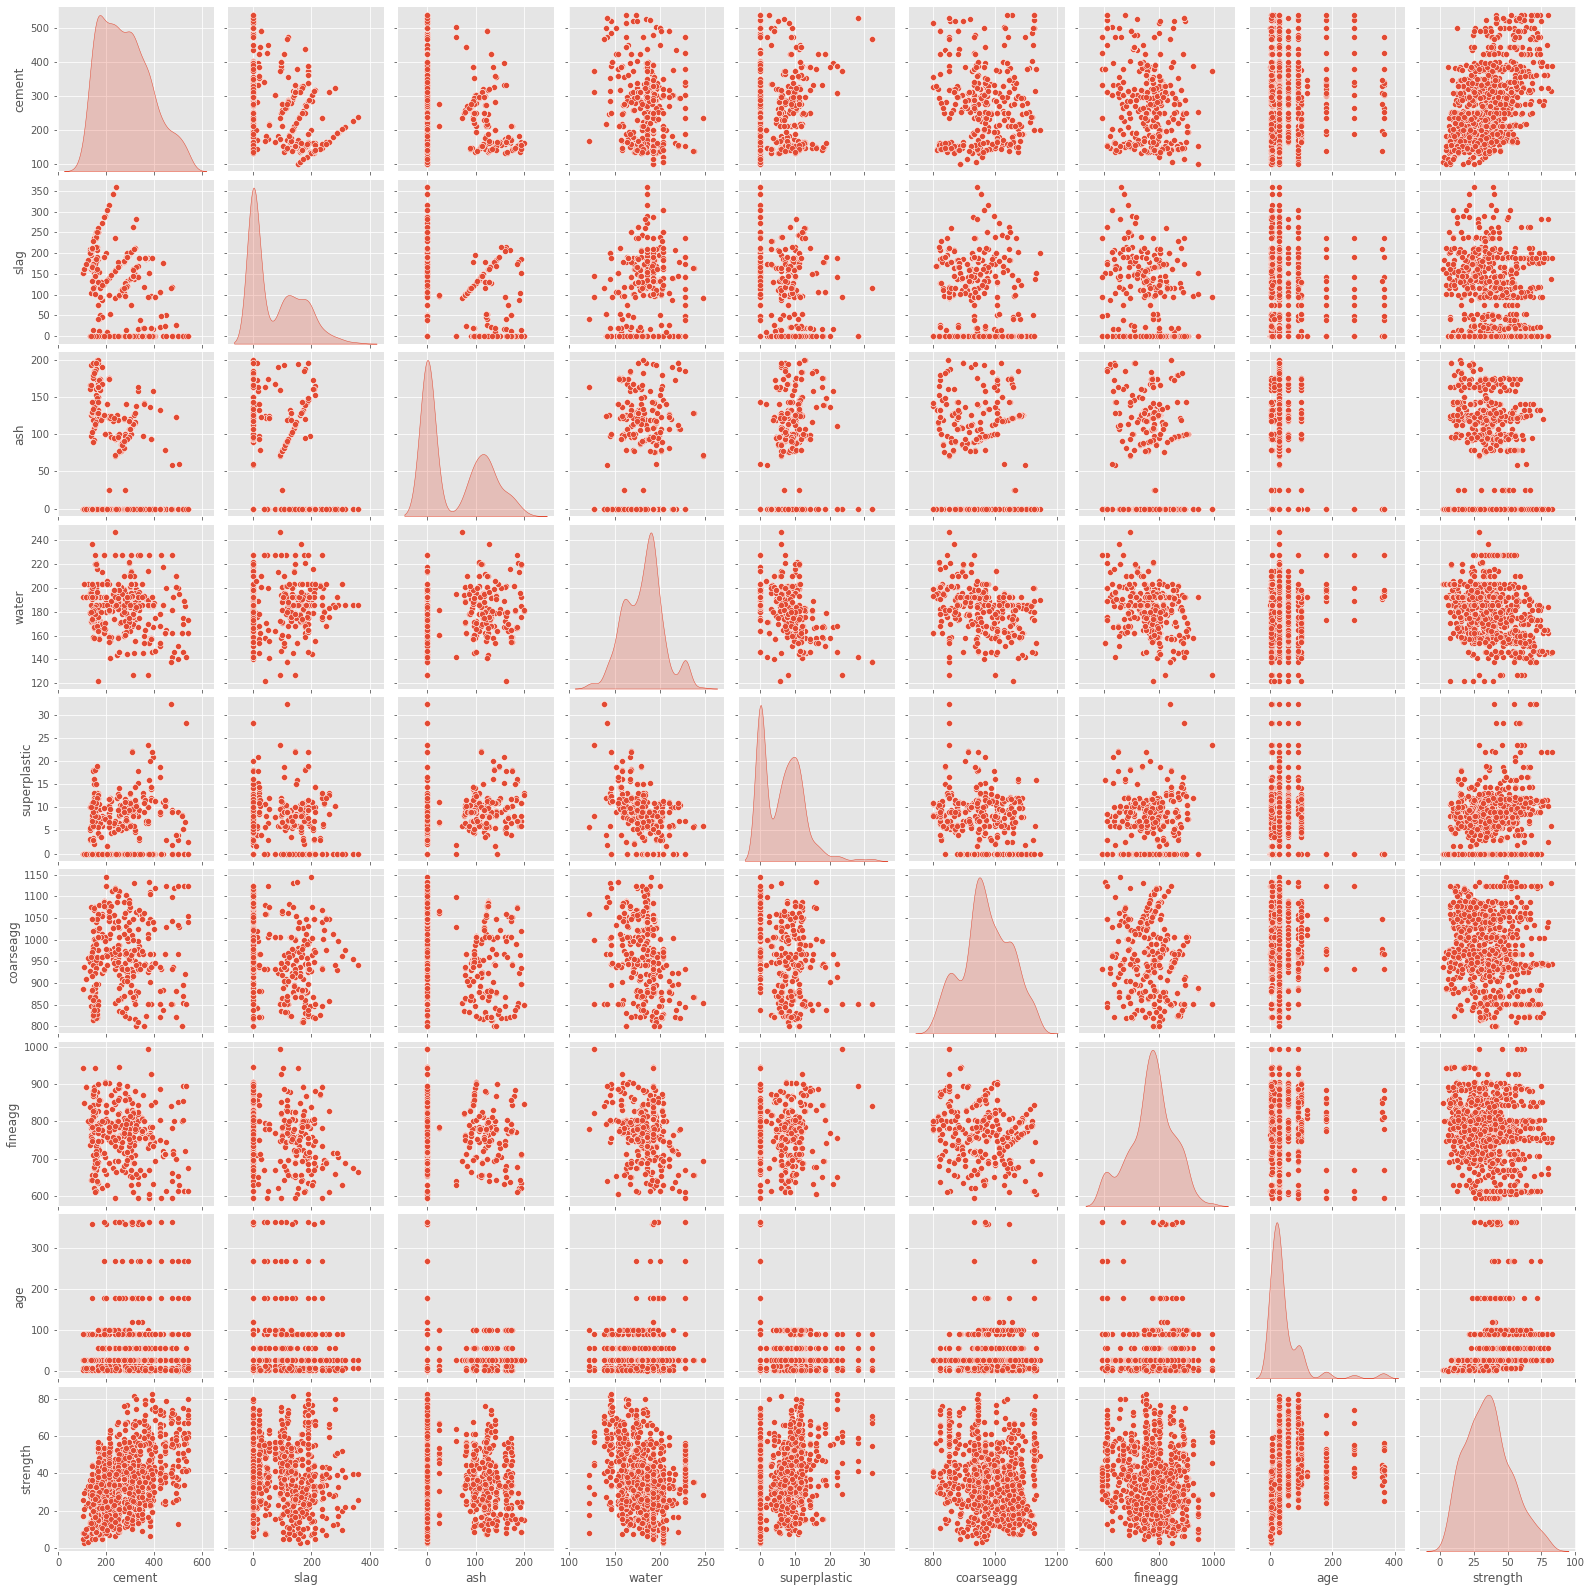

In [ ]:
sns.pairplot(concrete, diag_kind='kde');

**Observations:**
- Diagonal KDE Plots suggest Multiple Gaussians in most of the variables. 
- Target variable `strength` displays positive relationship with `cement`.
- With all other predictors, `strength` exhibits non-linear relationship which might be hard for us to model using Linear Algorithms.
- 'age' variable displays multiple clusters with discrete groupings.

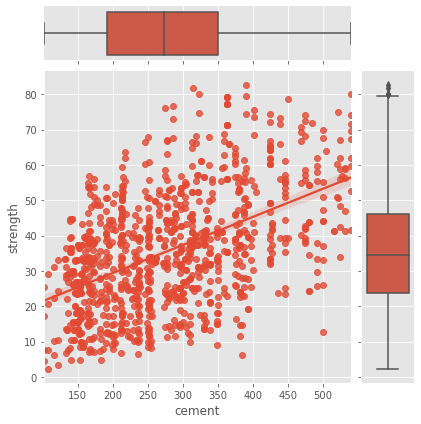

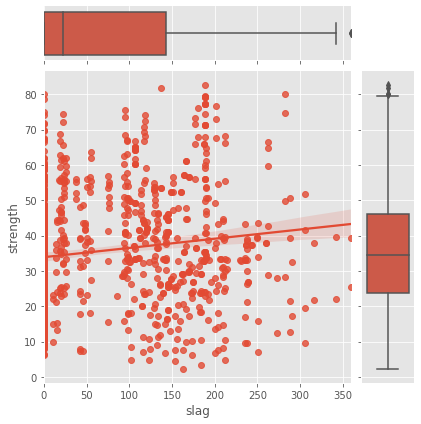

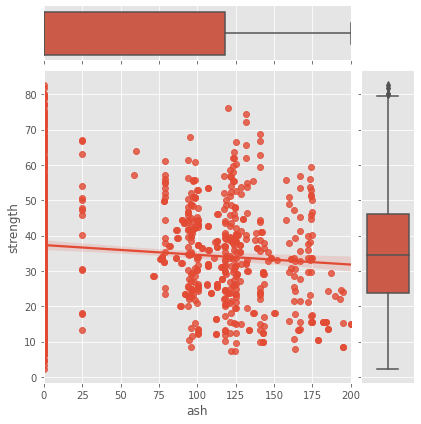

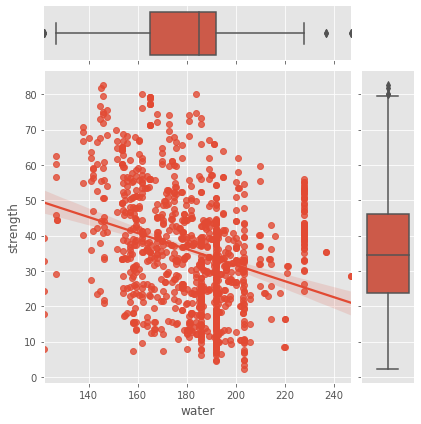

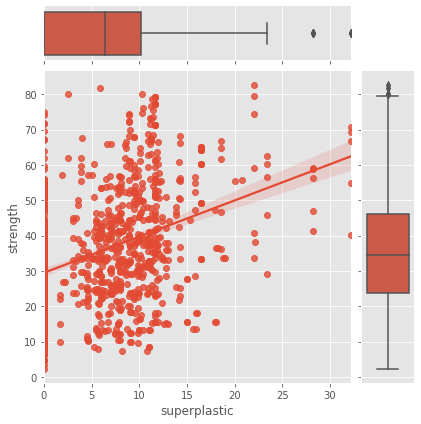

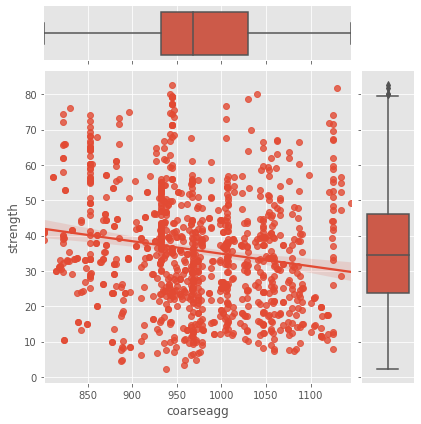

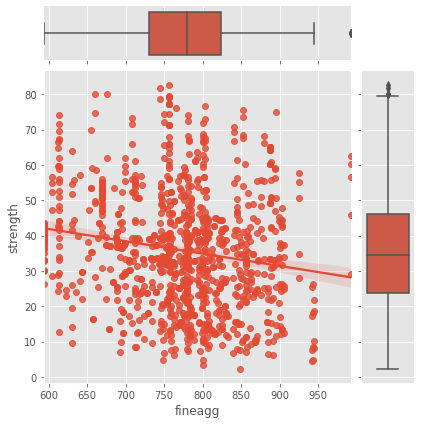

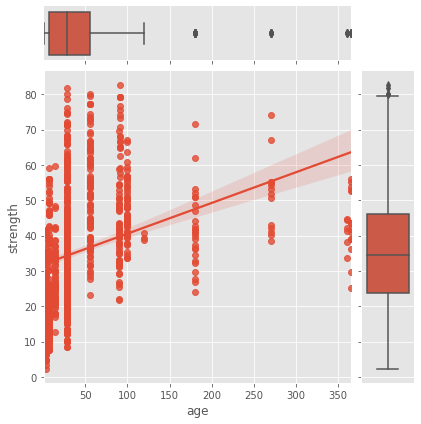

In [ ]:
predictor_cols = pd.Series(concrete.iloc[:,0:-1].columns)
for j in range(0,len(predictor_cols)):
  g = sns.JointGrid(x=concrete[predictor_cols[j]], y=concrete['strength'], palette='Set2')
  g.plot(sns.regplot, sns.boxplot)

As observed earlier, it can be seen that `strength` variable displays positive relationship only with `cement`.

#### Quantile-Quantile Plot to check Distribution Similarity among Features

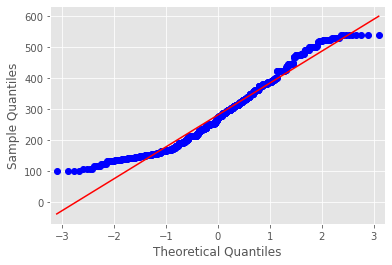

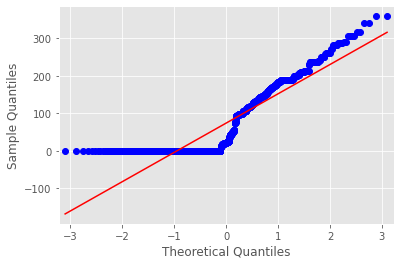

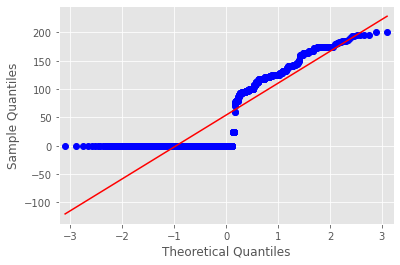

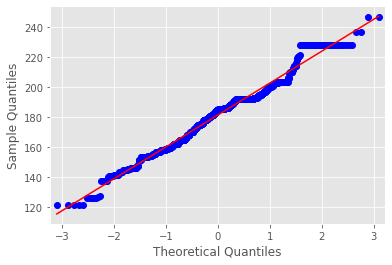

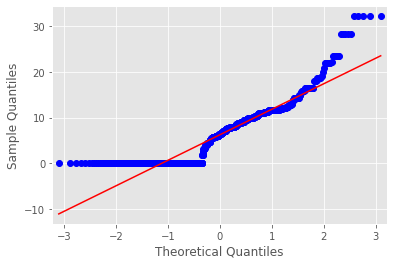

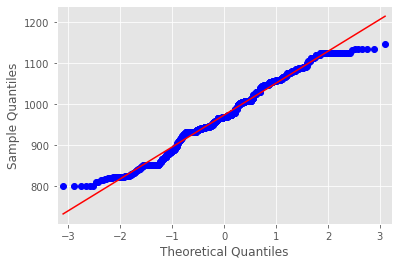

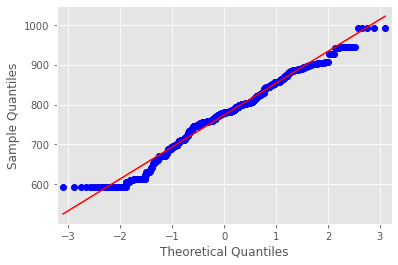

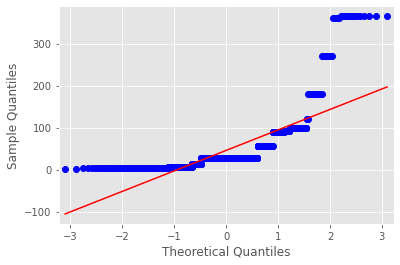

In [ ]:
for j in range(0,len(predictor_cols)):
  sm.qqplot(concrete[predictor_cols[j]], line='r')

Except for `cement` and `water` none of the other variables display similar distributions with other features. We can try to derive a new feature based on these two features.

#### Correlation Matrix

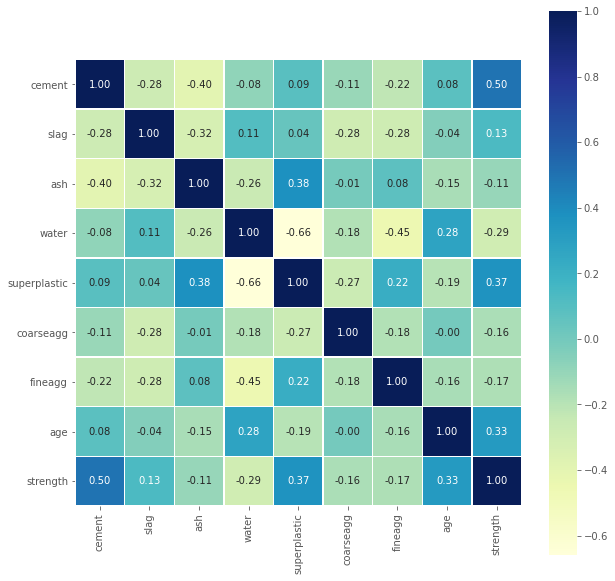

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(concrete.corr(), annot=True, linewidths = 0.3, fmt = '0.2f', cmap = 'YlGnBu', square=True)
plt.show()

`coarseagg` is one variable that exhibits negative correltion with every other feature.

#### Highly correlated features with target variable `strength`

<Figure size 1080x1080 with 0 Axes>

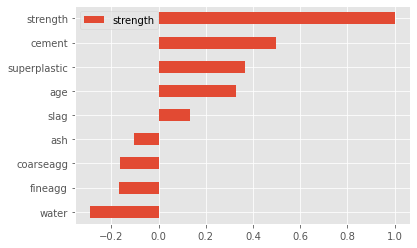

In [ ]:
plt.figure(figsize=(15,15))
concrete.corr()[['strength']].sort_values(by='strength', ascending=True).plot(kind='barh')
plt.show()

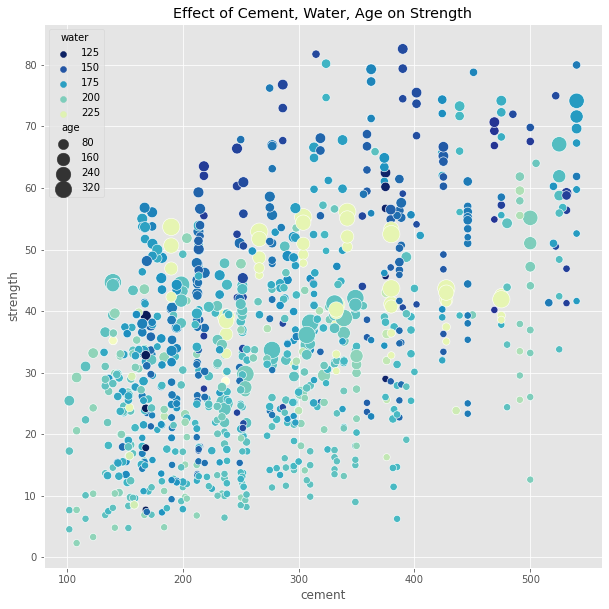

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(y="strength", x="cement", hue="water", size="age", data=concrete, sizes=(50, 300), palette='YlGnBu_r')
plt.title('Effect of Cement, Water, Age on Strength')
plt.show()

`strength` of the concrete increases with increase in `cement` in kg/m3. `age` (data point size) also seems to have slightly positive correlation with `strength`.

#### Detecting Multicollinear features using Variance Inflation Factor (VIF)

In [ ]:
def calculate_vif(X):
    vif_features = pd.DataFrame()
    vif_features["Features"] = X.columns
    vif_features["VIF Score"] = [vif(X.values, i) for i in range(X.shape[1])]
    return(vif_features)

In [ ]:
vif_df = calculate_vif(concrete.iloc[:,0:-1])
vif_df.sort_values(by='VIF Score', ascending=False)

Features  VIF Score
5     coarseagg  84.955779
3         water  82.157569
6       fineagg  72.790995
0        cement  15.456717
4  superplastic   5.471094
2           ash   4.147833
1          slag   3.329127
7           age   1.699459

## Step 5: Split the data into Train, Validation and Test set

In [ ]:
X = concrete.drop(columns='strength')
y = concrete['strength']

display(X.shape, y.shape)

(1030, 8)

(1030,)

In [ ]:
def train_val_test_split(X, y, frac_train=0.60, frac_val=0.20, frac_test=0.20, random_state=None):
    '''
    Helper function that splits a dataframe into three subsets (train, val, and test)
    by running train_test_split() twice.
    '''

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError('fractions %f, %f, %f do not add up to 1.0' % \
                         (frac_train, frac_val, frac_test))

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(X,
                                                          y,
                                                          test_size=(1.0 - frac_train),
                                                          random_state=random_state)

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(df_temp,
                                                      y_temp,
                                                      test_size=relative_frac_test,
                                                      random_state=random_state)

    assert len(X) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test, y_train, y_val, y_test

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X, y, frac_train=0.6, frac_val=0.2, frac_test=0.2, random_state=24)

In [ ]:
X_train_org, X_val_org, X_test_org, y_train_org, y_val_org, y_test_org = X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
display(X_train.shape, y_train.shape)

(618, 8)

(618,)

In [ ]:
display(X_val.shape, y_val.shape)

(206, 8)

(206,)

In [ ]:
display(X_test.shape, y_test.shape)

(206, 8)

(206,)

## Step 6: Feature Engineering & Data Preprocessing

### Log Transformation for treating Skewness & Minimizing Outliers

In [ ]:
#log(1+x) transformation is used since the features has '0' as one of the values
print('Features with Outliers & Skewness : ', outlier_treatment_features)
for fts in outlier_treatment_features:
  X_train[fts] = np.log1p(X_train[fts])
  X_val[fts] = np.log1p(X_val[fts])
  X_test[fts] = np.log1p(X_test[fts])

Features with Outliers & Skewness :  ['superplastic', 'fineagg', 'slag']


Integer Columns =  Index([], dtype='object')
Floating Point Columns =  Index(['superplastic', 'fineagg', 'slag'], dtype='object')
Object Columns =  Index([], dtype='object')
Category Columns =  Index([], dtype='object')


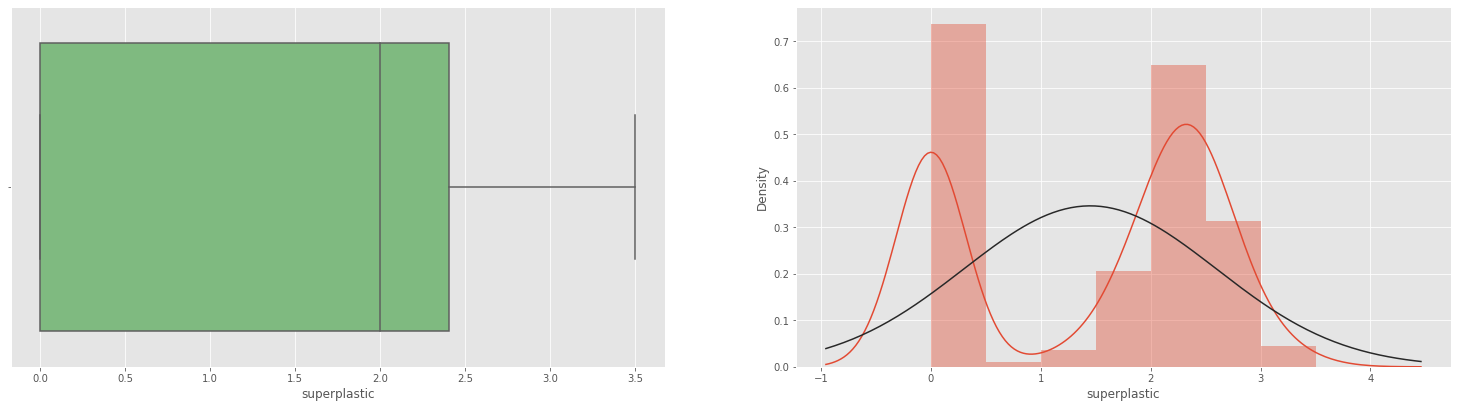

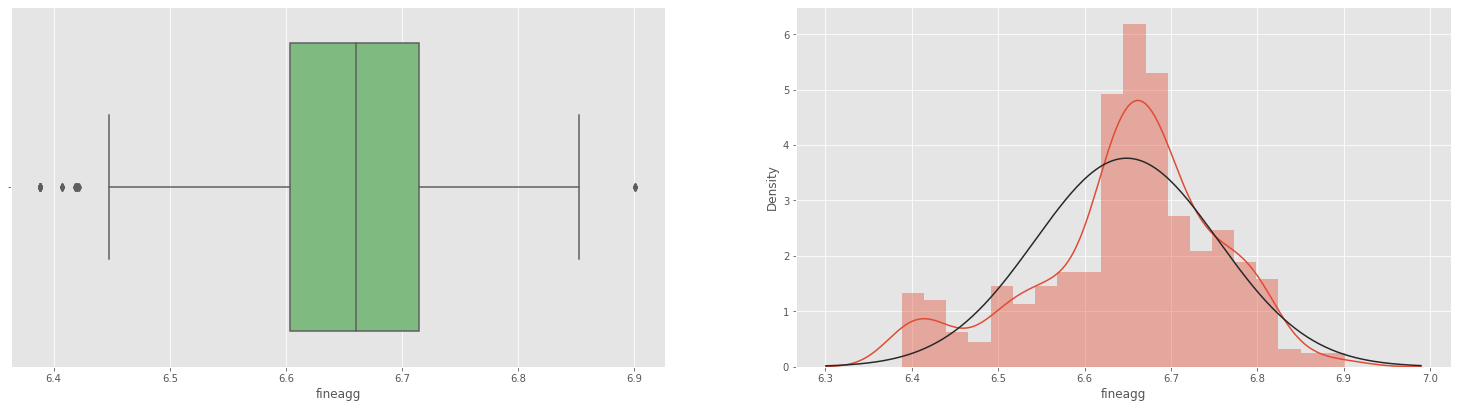

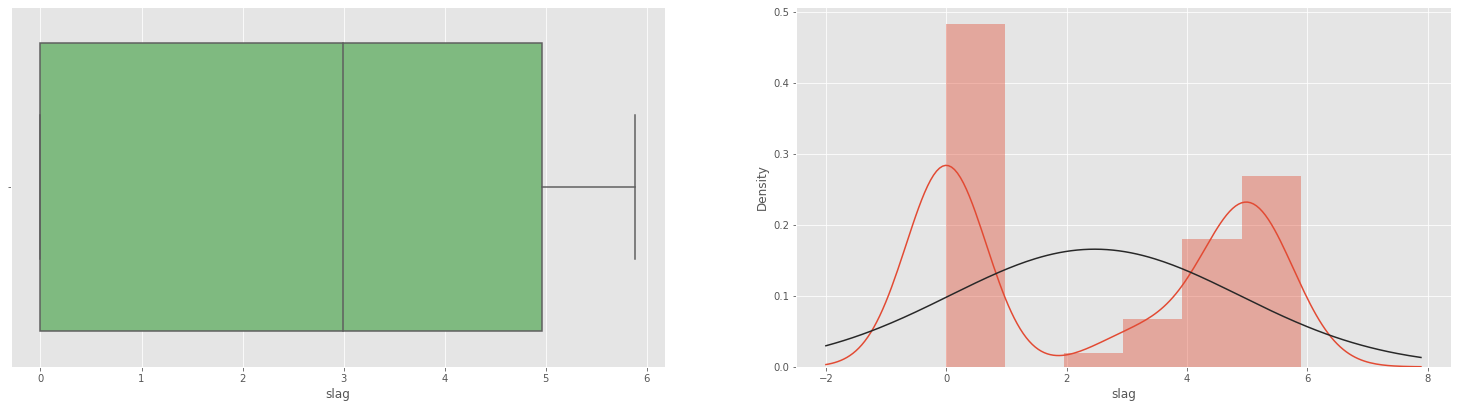

In [ ]:
plot_univariate_features(X_train[outlier_treatment_features])

### Derived Feature

**Domain-specific technical know-hows:**

- Superplasticizers (SP's), also known as high range water reducers, are additives used in making high strength concrete. Plasticizers are chemical compounds that enable the production of concrete with approximately 15% less water content. 
- The strength of concrete increases when the water to cement ratio decreases.
- The strength of concrete highly depends on the water to binder ratio. Here, binder is cement, ash, slag and superplasticizer.

From the correlation matrix, we can observe that correlation between
- `water` and `strength` is -0.29, whereas
- `cement` and `strength` is 0.50.

In [ ]:
X_train.head(3)

cement     slag  ash  water  superplastic  coarseagg   fineagg  age
511    296.0  0.00000  0.0  186.0      0.000000     1090.0  6.646391   28
1011   313.0  0.00000  0.0  178.0      2.197225     1000.0  6.712956   28
90     139.6  5.34901  0.0  192.0      0.000000     1047.0  6.694438    7

##### Derived Feature: `water_cement_ratio`:

In [ ]:
X_train['water_cement_ratio'] = (X_train['water'] / X_train['cement']).round(3)
X_train.head(3)

cement     slag  ash  water  superplastic  coarseagg   fineagg  age  \
511    296.0  0.00000  0.0  186.0      0.000000     1090.0  6.646391   28   
1011   313.0  0.00000  0.0  178.0      2.197225     1000.0  6.712956   28   
90     139.6  5.34901  0.0  192.0      0.000000     1047.0  6.694438    7   

      water_cement_ratio  
511                0.628  
1011               0.569  
90                 1.375

Integer Columns =  Index([], dtype='object')
Floating Point Columns =  Index(['water_cement_ratio'], dtype='object')
Object Columns =  Index([], dtype='object')
Category Columns =  Index([], dtype='object')


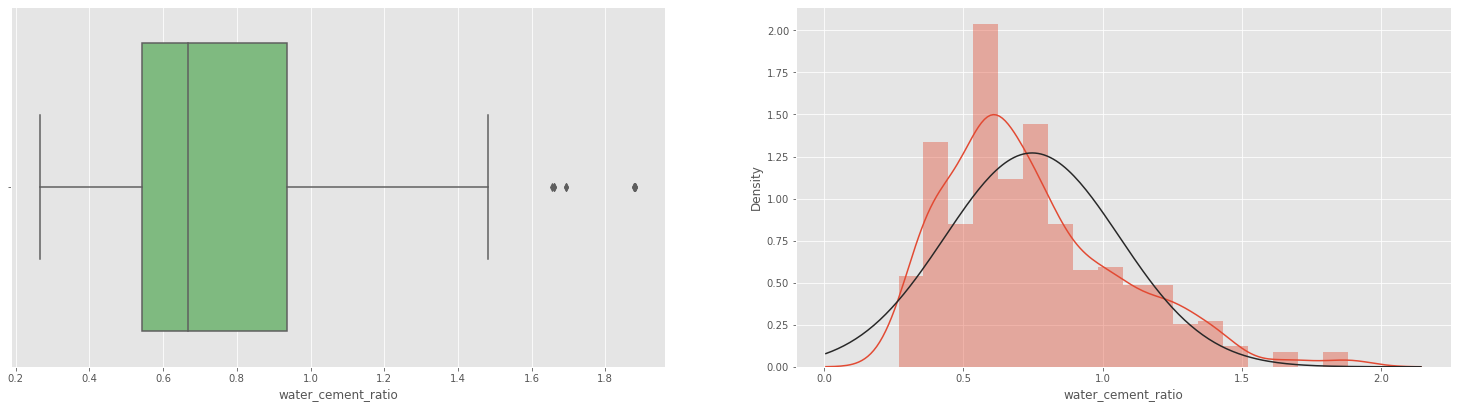

In [ ]:
plot_univariate_features(X_train[['water_cement_ratio']]);

In [ ]:
X_train = X_train.drop(columns=['water','cement'])

In [ ]:
X_train.describe().T

count        mean        std         min         25%  \
slag                618.0    2.466784   2.408843    0.000000    0.000000   
ash                 618.0   54.521845  64.694942    0.000000    0.000000   
superplastic        618.0    1.448061   1.153535    0.000000    0.000000   
coarseagg           618.0  975.311812  77.715672  801.000000  932.000000   
fineagg             618.0    6.648632   0.106110    6.388561    6.603537   
age                 618.0   48.621359  65.955284    3.000000   14.000000   
water_cement_ratio  618.0    0.746754   0.314106    0.267000    0.542000   

                           50%          75%          max  
slag                  2.995732     4.964236     5.887215  
ash                   0.000000   118.300000   195.000000  
superplastic          2.001480     2.406945     3.502550  
coarseagg           971.100000  1029.400000  1145.000000  
fineagg               6.660703     6.714837     6.901335  
age                  28.000000    56.000000   365.000000  
water_cement_ratio    0.667000     0.935000     1.882000

In [ ]:
#Including the Derived Feature in Validation and Test sets independently of Train set
X_val['water_cement_ratio'] = (X_val['water'] / X_val['cement']).round(3)
X_test['water_cement_ratio'] = (X_test['water'] / X_test['cement']).round(3)

In [ ]:
X_val = X_val.drop(columns=['water','cement'])
X_test = X_test.drop(columns=['water','cement'])

In [ ]:
X_train['superplastic'].value_counts()

0.000000    228
2.533697     23
2.197225     16
2.079442     14
2.174752      9
           ... 
2.639057      1
2.442347      1
2.517696      1
1.609438      1
2.791165      1
Name: superplastic, Length: 99, dtype: int64

In [ ]:
X_train[(X_train['ash']==0) & (X_train['superplastic']==0)]

slag  ash  superplastic  coarseagg   fineagg  age  \
511   0.000000  0.0           0.0     1090.0  6.646391   28   
90    5.349010  0.0           0.0     1047.0  6.694438    7   
896   0.000000  0.0           0.0      940.6  6.667720   28   
335   0.000000  0.0           0.0      974.0  6.654153   90   
468   0.000000  0.0           0.0     1111.0  6.665684   28   
...        ...  ...           ...        ...       ...  ...   
850   3.881564  0.0           0.0      932.0  6.388561  270   
1007  5.262690  0.0           0.0      932.0  6.577583    3   
207   5.252273  0.0           0.0      932.0  6.508769  180   
145   4.817051  0.0           0.0      959.2  6.685861   90   
343   5.674010  0.0           0.0      998.2  6.558623   28   

      water_cement_ratio  
511                0.628  
90                 1.375  
896                0.489  
335                0.580  
468                0.734  
...                  ...  
850                0.533  
1007               0.667  
207                1.200  
145                1.107  
343                0.960  

[223 rows x 7 columns]

### Binning - `age` Feature

<AxesSubplot:>

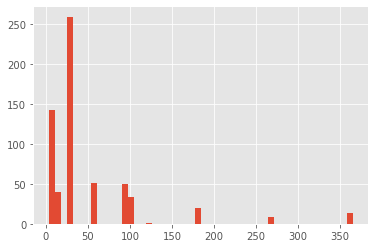

In [ ]:
X_train_fe = X_train.copy(deep=True)
X_train_fe['age'].hist(bins=50)

In [ ]:
bins = [0,30,60,150,300,365]
age_groups = ['0_30days','30_60days','60_150days','150_300days','beyond_300days']
X_train_fe['age_group'] = pd.cut(X_train_fe['age'], bins, labels=age_groups)

In [ ]:
X_train_fe[['age_group']].describe().T

count unique       top freq
age_group   618      5  0_30days  441

In [ ]:
X_train_fe.head(5)

slag    ash  superplastic  coarseagg   fineagg  age  \
511   0.00000    0.0      0.000000     1090.0  6.646391   28   
1011  0.00000    0.0      2.197225     1000.0  6.712956   28   
90    5.34901    0.0      0.000000     1047.0  6.694438    7   
1006  0.00000  195.0      2.484907      898.0  6.570883   28   
512   0.00000  112.6      2.406945      925.3  6.664281   28   

      water_cement_ratio age_group  
511                0.628  0_30days  
1011               0.569  0_30days  
90                 1.375  0_30days  
1006               1.392  0_30days  
512                0.541  0_30days

### Ordinal Encoding `age_group` (Transformed Feature)

In [ ]:
# Replace the numbers in categorical variables with Ordinal values

X_train_fe['age_group'] = X_train_fe['age_group'].replace({
    '0_30days':1, '30_60days':2,'60_150days':3,'150_300days':4,'beyond_300days':5})

X_train_fe.head()

slag    ash  superplastic  coarseagg   fineagg  age  \
511   0.00000    0.0      0.000000     1090.0  6.646391   28   
1011  0.00000    0.0      2.197225     1000.0  6.712956   28   
90    5.34901    0.0      0.000000     1047.0  6.694438    7   
1006  0.00000  195.0      2.484907      898.0  6.570883   28   
512   0.00000  112.6      2.406945      925.3  6.664281   28   

      water_cement_ratio  age_group  
511                0.628          1  
1011               0.569          1  
90                 1.375          1  
1006               1.392          1  
512                0.541          1

In [ ]:
X_train_fe.drop(columns='age', inplace=True)
X_train_fe.sample(3)

slag    ash  superplastic  coarseagg   fineagg  water_cement_ratio  \
855  4.675629    0.0      2.975530      936.0  6.690470               0.356   
394  3.933784  173.5      2.014903     1006.2  6.677713               0.950   
27   4.675629    0.0      2.862201      852.1  6.789084               0.361   

     age_group  
855          1  
394          1  
27           3

Note: `age` variable is binned here, however not used in the final model since binning results in significant loss of information and resulting in degraded model performance.

In [ ]:
#Repeating the Feature Engineering steps for Validation & Test sets independently

# X_val['age_group'] = pd.cut(X_val['age'], bins, labels=age_groups)
# X_val['age_group'] = X_val['age_group'].replace({
#     '0_30days':1, '30_60days':2,'60_150days':3,'150_300days':4,'beyond_300days':5})

# X_test['age_group'] = pd.cut(X_test['age'], bins, labels=age_groups)
# X_test['age_group'] = X_test['age_group'].replace({
#     '0_30days':1, '30_60days':2,'60_150days':3,'150_300days':4,'beyond_300days':5})

# X_val.drop(columns='age', inplace=True)
# X_test.drop(columns='age', inplace=True)

### Robust Scaling the Features

In [ ]:
scaler = RobustScaler(copy=True)

cols = X_train.columns
# Fit on Train set
scaler.fit(X_train.values)

# Transform Train, Validation and Test sets
X_train = scaler.transform(X_train.values)
X_val = scaler.transform(X_val.values)
X_test = scaler.transform(X_test.values)

In [ ]:
X_train = pd.DataFrame(X_train, columns=cols)
X_train.head(3)

slag       ash  superplastic  coarseagg   fineagg       age  \
0 -1.024883 -0.843435     -1.256342   1.476936 -0.021143 -0.312910   
1 -1.024883 -0.843435      0.649977   0.317931  0.606693 -0.312910   
2  1.197488 -0.843435     -1.256342   0.923189  0.432036 -0.631565   

   water_cement_ratio  
0           -0.378376  
1           -0.566363  
2            2.001727

In [ ]:
X_val = pd.DataFrame(X_val, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

### Unsupervised Learning Methods for Featurization

##### Cluster Map to understand Feature Dependence

<Figure size 720x720 with 0 Axes>

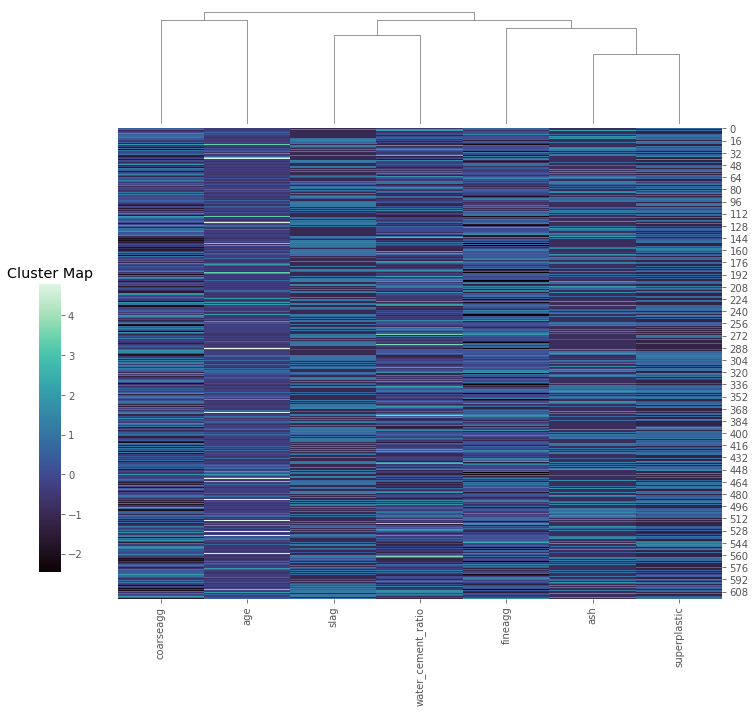

In [ ]:
plt.figure(figsize=(10,10))
sns.clustermap(X_train, method='average', metric='euclidean', 
               dendrogram_ratio=(.1, .2), 
               cbar_pos=(0, .2, .03, .4), 
               row_cluster=False, cmap="mako")
plt.title("Cluster Map")
plt.show()

##### K-Means Clustering

***Finding the Optimal Number of Clusters***

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

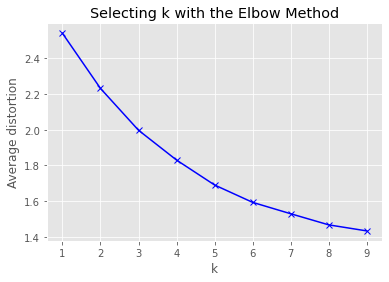

In [ ]:
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_train)
    prediction=model.predict(X_train)
    meanDistortions.append(sum(np.min(cdist(X_train, model.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

**Observations:**
- Elbow is not clearly visible from the Elbow Plot.
- Let us use 'Silhouette Plot' to decide on the Elbow and optimal number of clusters.

#### Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.243
For n_clusters = 3 The average silhouette_score is : 0.243
For n_clusters = 4 The average silhouette_score is : 0.273
For n_clusters = 5 The average silhouette_score is : 0.299
For n_clusters = 6 The average silhouette_score is : 0.31


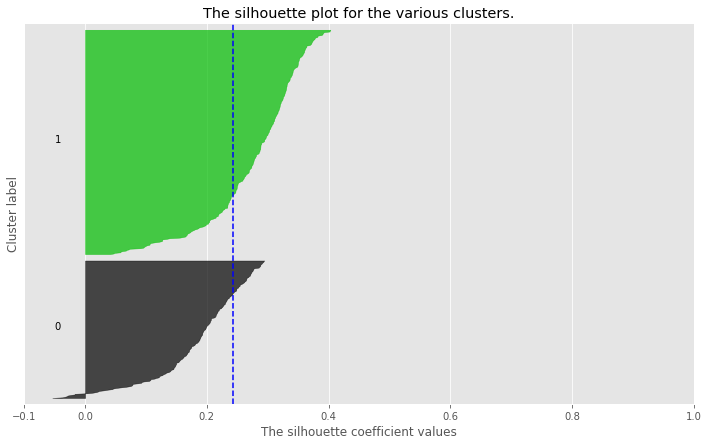

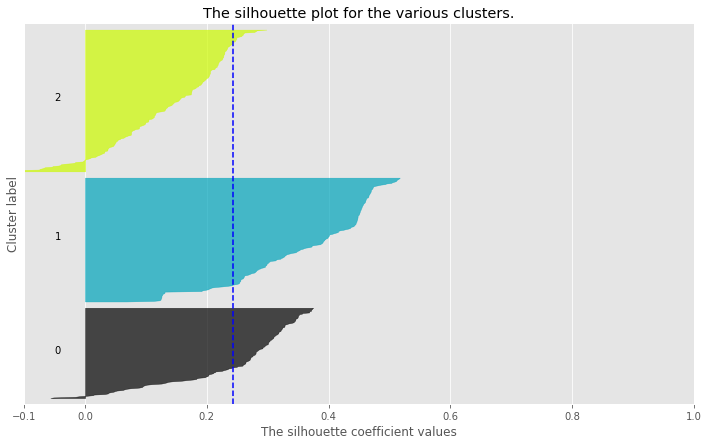

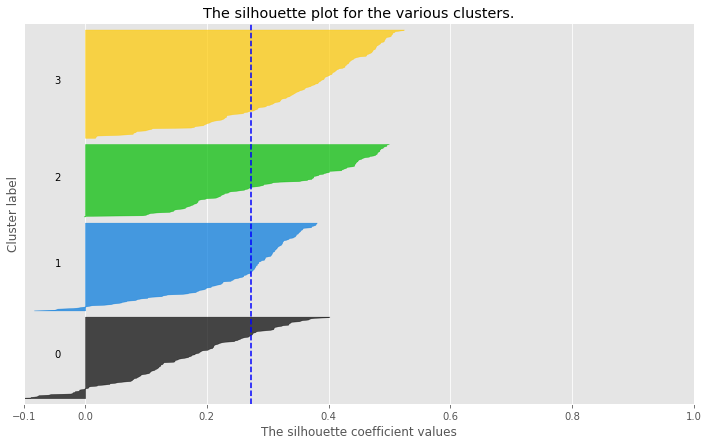

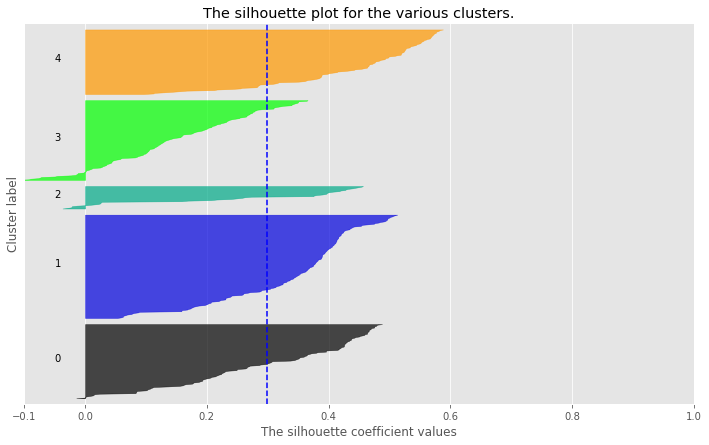

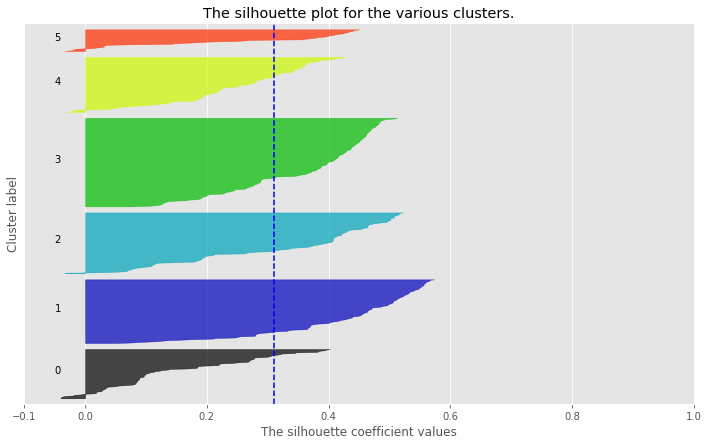

In [ ]:
range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(12, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=24)
    cluster_labels = clusterer.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg.round(3))
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="blue", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

**Observations:**
- When k=4, the clusters are all of uniform size with significant reduction in Silhouette score.
- All other cluster sizes results in varied cluster sizes.

In [ ]:
# Let us first start with K = 4 based on Silhouette Plot
final_model=KMeans(n_clusters=4)
final_model.fit(X_train)
prediction_train = final_model.predict(X_train)

#Append the prediction 
X_train["CLUSTER"] = prediction_train
print("Clusters Assigned : \n")
X_train.head()

Clusters Assigned : 



slag       ash  superplastic  coarseagg   fineagg       age  \
0 -1.024883 -0.843435     -1.256342   1.476936 -0.021143 -0.312910   
1 -1.024883 -0.843435      0.649977   0.317931  0.606693 -0.312910   
2  1.197488 -0.843435     -1.256342   0.923189  0.432036 -0.631565   
3 -1.024883  2.173152      0.899570  -0.995609 -0.733317 -0.312910   
4 -1.024883  0.898450      0.831931  -0.644044  0.147602 -0.312910   

   water_cement_ratio  CLUSTER  
0           -0.378376        1  
1           -0.566363        3  
2            2.001727        2  
3            2.055893        3  
4           -0.655577        3

In [ ]:
X_train.CLUSTER.value_counts().sort_index()

0    130
1    155
2    142
3    191
Name: CLUSTER, dtype: int64

In [ ]:
X_train.groupby(['CLUSTER']).mean()

slag       ash  superplastic  coarseagg   fineagg       age  \
CLUSTER                                                                    
0        0.766503 -0.424338      0.891671  -0.695397  0.037921 -0.222916   
1       -0.807766 -0.837547     -1.182082   0.498270 -0.271120  0.639238   
2        1.105508 -0.263421     -0.399203  -0.248323 -0.313169 -0.250718   
3       -0.688082  1.164343      0.649174   0.253568  0.427036 -0.180633   

         water_cement_ratio  
CLUSTER                      
0                 -0.907165  
1                 -0.538694  
2                  1.200910  
3                  0.161779

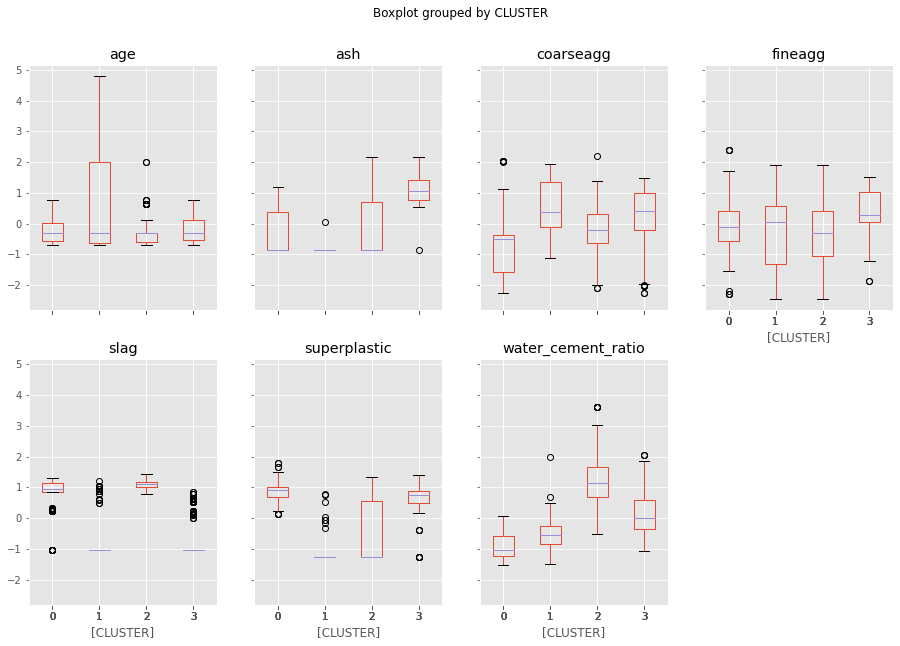

In [ ]:
X_train.boxplot(by='CLUSTER', layout = (2,4),figsize=(15,10));

**Observations on the different Clusters:**
- `water_cement_ratio` is increasing in ascending order for the clusters 0,1,3 and 2. 
- In case of `ash` and `slag` all the 0 values which we have observed in Univariate Analysis are clustered into a single Cluster (Cluster 1). 
- Other clusters are not providing meaningful information. Let us consider building a Gaussian Mixture Model to improvise on the same.

In [ ]:
prediction_val = final_model.predict(X_val)
prediction_test = final_model.predict(X_test)

#Append the prediction to Validation and Test sets
X_val["CLUSTER"] = prediction_val
X_test["CLUSTER"] = prediction_test

Let us plot the Clusters by considering two of the major features `age` and `water_cement_ratio`

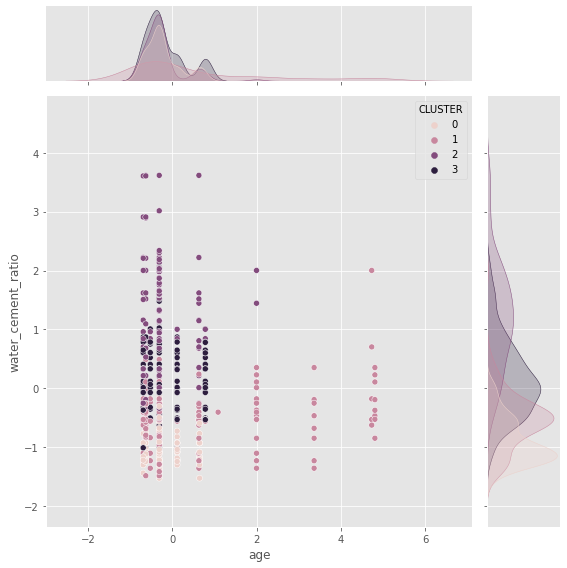

In [ ]:
sns.jointplot(data=X_train, x='age', y='water_cement_ratio', hue='CLUSTER', kind='scatter', height=8, ratio=5, color='g');

We can see that the Clusters identified by KMeans is not proper as several of the data points are overlapping (since it considers only 'mean').

Gaussian Mixture Models consider the mean and variance (distribution) of the data points. 

#### Gaussian Mixture Models

In [ ]:
# Gaussian Mixture Model to Cluster based on Distribution of Data
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=4, random_state=18)
data = X_train[['age', 'water_cement_ratio']]
#data = X_train[['age', 'water_cement_ratio', 'superplastic', 'ash']]
gmm.fit(data)

GaussianMixture(n_components=4, random_state=18)

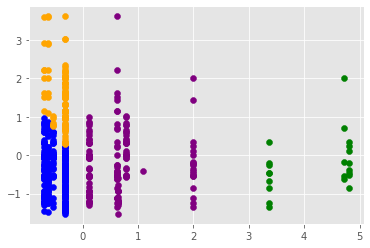

In [ ]:
#predictions from gmm
labels = gmm.predict(data)
gmmCluster = pd.DataFrame(data)
gmmCluster['cluster'] = labels
gmmCluster.columns = ['age', 'water_cement_ratio', 'cluster']

color=['blue','green','orange', 'purple']
for k in range(0,4):
    data = gmmCluster[gmmCluster["cluster"]==k]
    plt.scatter(data["age"],data["water_cement_ratio"],c=color[k])
plt.show()

In [ ]:
gmmCluster.head()

age  water_cement_ratio  cluster
0 -0.312910           -0.378376        0
1 -0.312910           -0.566363        0
2 -0.631565            2.001727        2
3 -0.312910            2.055893        2
4 -0.312910           -0.655577        0

In [ ]:
gmmCluster.describe().T

count          mean       std       min       25%  \
age                 618.0 -1.022196e-16  1.000810 -0.692262 -0.525347   
water_cement_ratio  618.0 -4.095968e-17  1.000810 -1.528600 -0.652391   
cluster             618.0  1.189320e+00  1.297579  0.000000  0.000000   

                         50%       75%       max  
age                -0.312910  0.111964  4.800751  
water_cement_ratio -0.254114  0.599792  3.617139  
cluster             0.000000  2.750000  3.000000

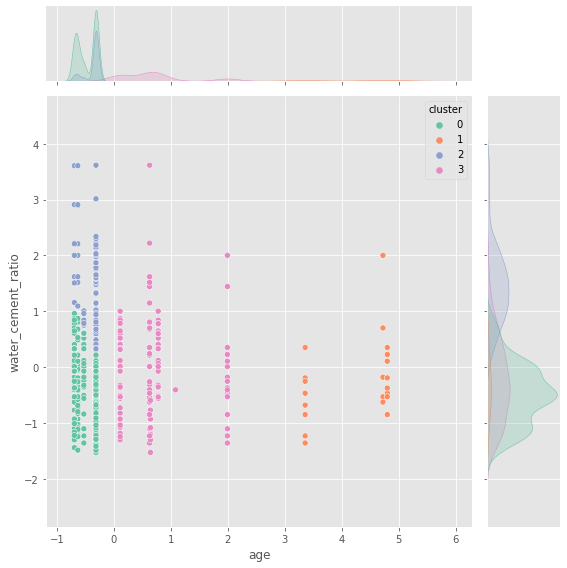

In [ ]:
sns.jointplot(
    data=gmmCluster, 
    x='age', y='water_cement_ratio', 
    hue='cluster', 
    kind='scatter', 
    height=8, ratio=5, 
    palette='Set2'
    );

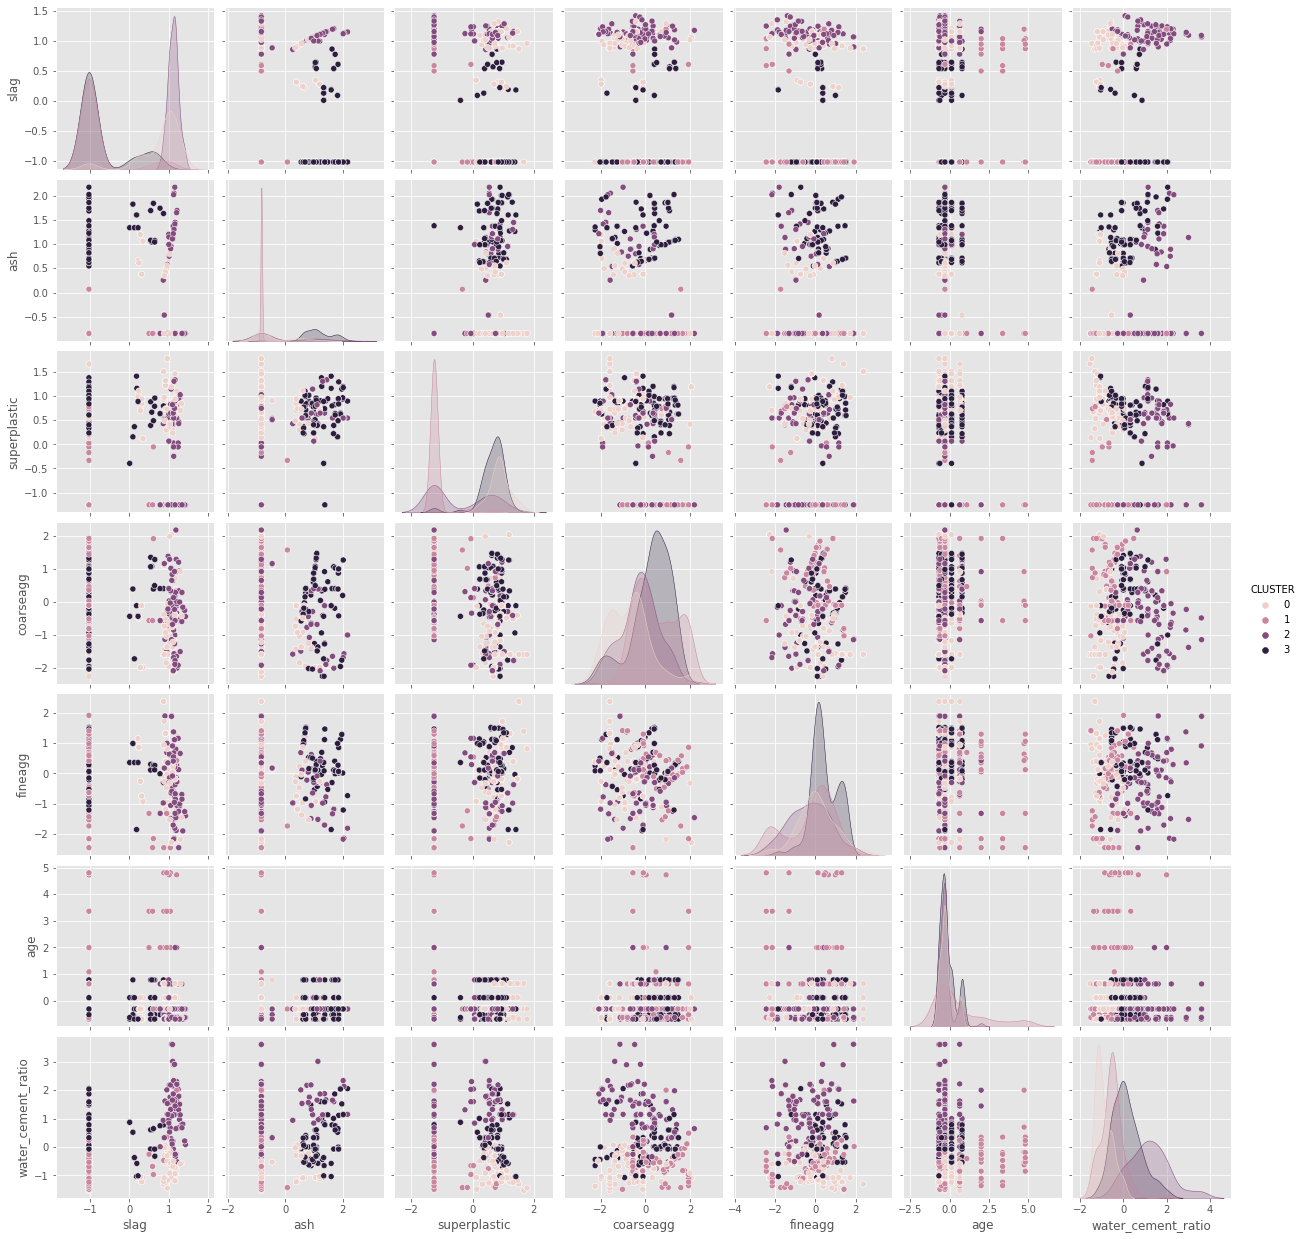

In [ ]:
sns.pairplot(data=X_train, hue='CLUSTER', diag_kind='kde')

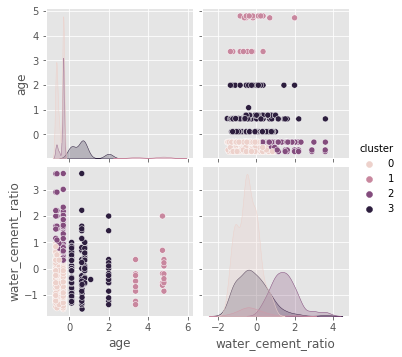

In [ ]:
sns.pairplot(data=gmmCluster, hue='cluster', diag_kind='kde')

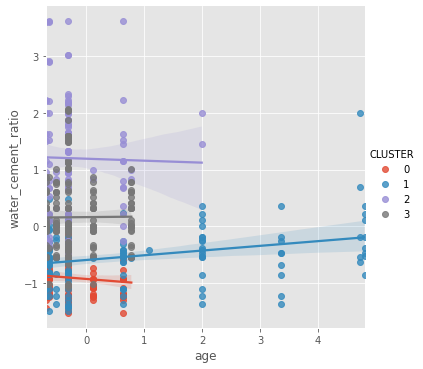

In [ ]:
sns.lmplot(
    x='age',
    y='water_cement_ratio',
    data=X_train,
    hue='CLUSTER');

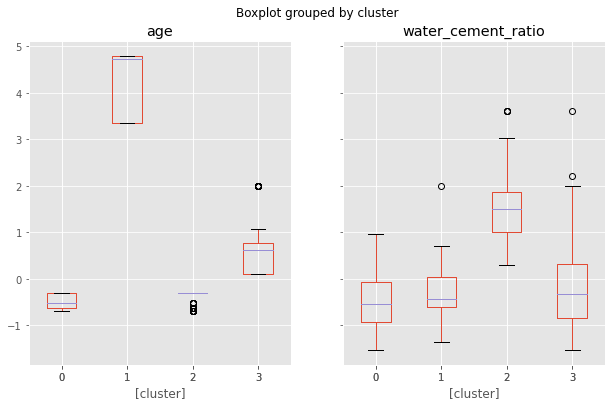

In [ ]:
gmmCluster.boxplot(by='cluster', layout = (1,2),figsize=(10,6));

**Observations:**
- Gaussian Mixture Model (GMM) has provided a better separation of Clusters when compared to KMeans.
- This might be because of the fact that GMM uses distribution of data points to cluster, whereas KMeans uses only Distance measures such as Euclidean. 
- `water_cement_ratio` has been clustered in ascending order for clusters 0,1,3 and 2. (similar to KMeans).
- `age` variable is clustered into multiple clusters (similar to our expectations from Univariate Analysis).

## Step 8: Building Baseline Model & Deciding on Model Complexity

Baseline Models - both linear and tree based would be built to check on the Model Complexity.

### Building a Baseline Regressor - Linear Regression - Original Dataset

In [ ]:
linr_reg_org = LinearRegression(copy_X=True, n_jobs=-1)

linr_reg_org.fit(X_train_org, y_train_org)

LinearRegression(n_jobs=-1)

In [ ]:
linr_reg_org.score(X_train_org, y_train_org)

0.6243664962922777

In [ ]:
y_pred_lr_org = linr_reg_org.predict(X_val_org)

In [ ]:
rmse_lr_org = np.sqrt(mean_squared_error(y_val_org, y_pred_lr_org))
mae_lr_org = mean_absolute_error(y_val_org, y_pred_lr_org)
r2_lr_org = r2_score(y_val_org, y_pred_lr_org)

In [ ]:
print("Model\t\t\t RMSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(rmse_lr_org, mae_lr_org, r2_lr_org))

Model			 RMSE 		 MAE 		 R2
LinearRegression 	 10.42 		8.24 		0.63


### Building a Baseline Regressor - Linear Regression - Feature Engineered Dataset

In [ ]:
linr_reg = LinearRegression(copy_X=True, n_jobs=-1)

linr_reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
linr_reg.score(X_train, y_train)

0.5891697201725308

In [ ]:
y_pred_lr = linr_reg.predict(X_val)

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linr_reg.coef_[idx]))

The coefficient for slag is 4.445924855745738
The coefficient for ash is -0.7581212306317845
The coefficient for superplastic is 5.986061628412468
The coefficient for coarseagg is -0.04635785013846914
The coefficient for fineagg is -1.223791258383809
The coefficient for age is 6.156905617330509
The coefficient for water_cement_ratio is -8.548560874311438
The coefficient for CLUSTER is -0.5874269914983771


In [ ]:
intercept = linr_reg.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 36.92204873041482


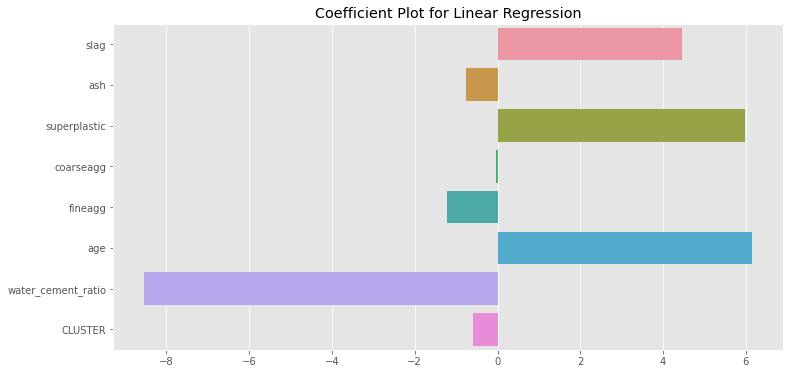

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=X_train.columns, x=linr_reg.coef_, orient='h')
plt.title('Coefficient Plot for Linear Regression')
plt.show()

In [ ]:
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
mae_lr = mean_absolute_error(y_val, y_pred_lr)
r2_lr = r2_score(y_val, y_pred_lr)

In [ ]:
print("Model\t\t\t RMSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(rmse_lr, mae_lr, r2_lr))

Model			 RMSE 		 MAE 		 R2
LinearRegression 	 10.88 		8.73 		0.60


### Building a Polynomial Regressor

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [ ]:
poly.fit(X_train_org)

PolynomialFeatures(include_bias=False)

In [ ]:
X_train_poly = poly.transform(X_train_org)

In [ ]:
X_val_poly = poly.transform(X_val_org)

In [ ]:
X_train_poly.shape

(618, 54)

In [ ]:
print('Polynomial Features of Degree 2 : ',poly.get_feature_names())

Polynomial Features of Degree 2 :  ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x6^2', 'x6 x7', 'x6 x8', 'x7^2', 'x7 x8', 'x8^2']


In [ ]:
X_train_poly = pd.DataFrame(X_train_poly, columns=poly.get_feature_names())
X_val_poly = pd.DataFrame(X_val_poly, columns=poly.get_feature_names())

In [ ]:
linR_poly_reg = LinearRegression(n_jobs=-1)

In [ ]:
linR_poly_reg.fit(X_train_poly, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
linR_poly_reg.score(X_train_poly, y_train)

0.836611412521677

In [ ]:
y_pred__poly_lr = linR_poly_reg.predict(X_val_poly)

In [ ]:
linR_poly_reg.coef_[0]

3.4996301570608472

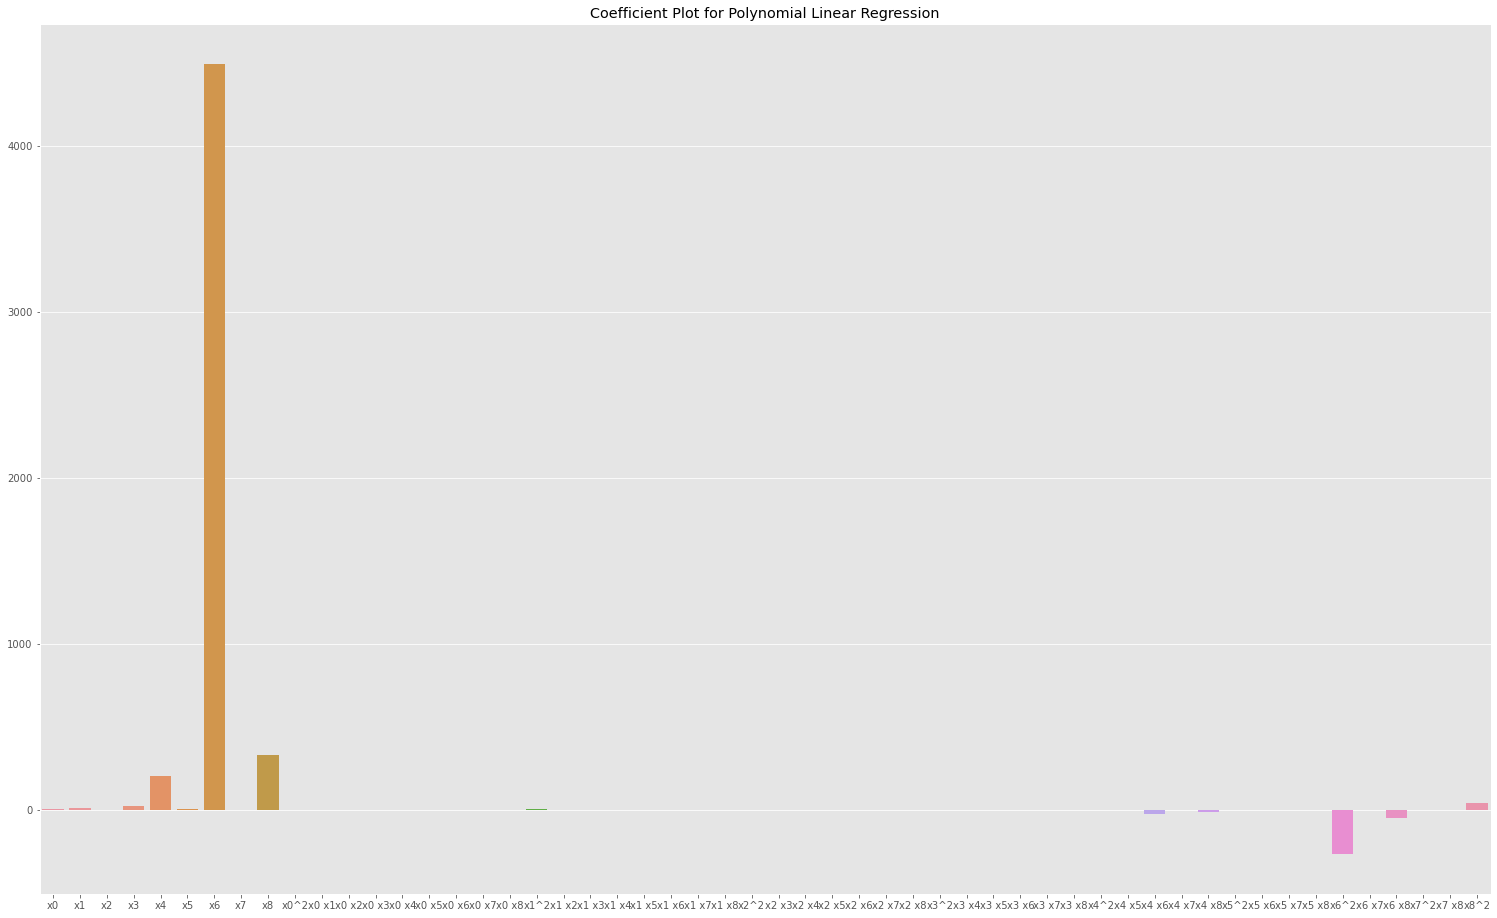

In [ ]:
plt.figure(figsize=(26,16))
sns.barplot(x=X_train_poly.columns, y=linR_poly_reg.coef_)
plt.title('Coefficient Plot for Polynomial Linear Regression')
plt.show()

In [ ]:
rmse_poly_lr = np.sqrt(mean_squared_error(y_val, y_pred__poly_lr))
mae_poly_lr = mean_absolute_error(y_val, y_pred__poly_lr)
r2_poly_lr = r2_score(y_val, y_pred__poly_lr)

In [ ]:
print("Model\t\t\t\t\t RMSE \t\t MAE \t\t R2")
print("""Polynominal Linear Regression \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(rmse_poly_lr, mae_poly_lr, r2_poly_lr))

Model					 RMSE 		 MAE 		 R2
Polynominal Linear Regression 		 7.57 		5.88 		0.81


### Building a SVR Radial Basis Functional Kernel Regressor

In [ ]:
svr_reg = SVR(kernel='rbf', degree=5, C=1.0)

In [ ]:
svr_reg.fit(X_train, y_train)

SVR(degree=5)

In [ ]:
svr_reg.score(X_train, y_train)

0.6266809987007861

In [ ]:
y_pred_svr = svr_reg.predict(X_val)

In [ ]:
rmse_svr = np.sqrt(mean_squared_error(y_val, y_pred_svr))
mae_svr = mean_absolute_error(y_val, y_pred_svr)
r2_svr = r2_score(y_val, y_pred_svr)

In [ ]:
print("Model\t\t RMSE \t\t MAE \t\t R2")
print("""SVR \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(rmse_svr, mae_svr, r2_svr))

Model		 RMSE 		 MAE 		 R2
SVR 		 10.44 		8.47 		0.63


### Building a Tree Regressor

In [ ]:
dt_reg = DecisionTreeRegressor(criterion='mse', random_state=24)

In [ ]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=24)

In [ ]:
dt_reg.score(X_train, y_train)

0.9953071090716287

In [ ]:
y_pred_dtr = dt_reg.predict(X_val)

In [ ]:
rmse_dtr = np.sqrt(mean_squared_error(y_val, y_pred_dtr))
mae_dtr = mean_absolute_error(y_val, y_pred_dtr)
r2_dtr = r2_score(y_val, y_pred_dtr)

In [ ]:
print("Model\t\t RMSE \t\t MAE \t\t R2")
print("""DT \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(rmse_dtr, mae_dtr, r2_dtr))

Model		 RMSE 		 MAE 		 R2
DT 		 6.16 		4.17 		0.87


### Predictions vs Ground Truth Plot for Baseline Models

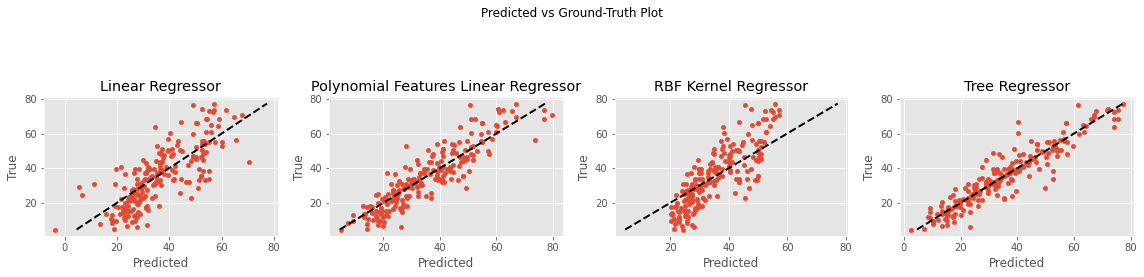

In [ ]:
# Predicted vs Ground-Truth Plot for all the Baseline Models
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,4))

ax1.scatter(y_pred_lr, y_val, s=20)
ax1.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regressor")

ax2.scatter(y_pred__poly_lr, y_val, s=20)
ax2.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Polynomial Features Linear Regressor")

ax3.scatter(y_pred_svr, y_val, s=20)
ax3.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("RBF Kernel Regressor")

ax4.scatter(y_pred_dtr, y_val, s=20)
ax4.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
ax4.set_ylabel("True")
ax4.set_xlabel("Predicted")
ax4.set_title("Tree Regressor")

fig.suptitle("Predicted vs Ground-Truth Plot\n\n")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

**Observations:**
- Linear Models have provided poor performance with R2 score in the range of 60s.
- Linear Model with higher Polynomial Degree and Tree Regressor has provided a much better R2 score in the range of 80s.
- Let us explore the degree of linearity further using Polynomial fit.

### Deciding on Model Complexity - Linear or Non-Linear

##### Plotting the Residuals to understand Linear Model Assumptions

<AxesSubplot:xlabel='slag', ylabel='strength'>

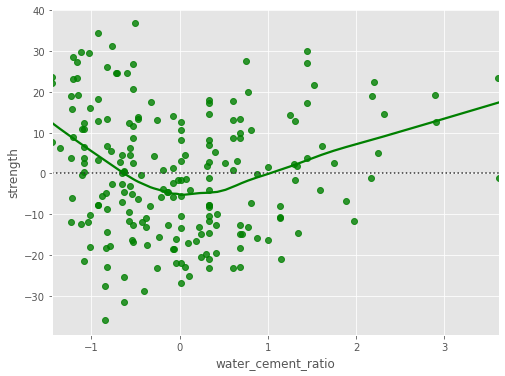

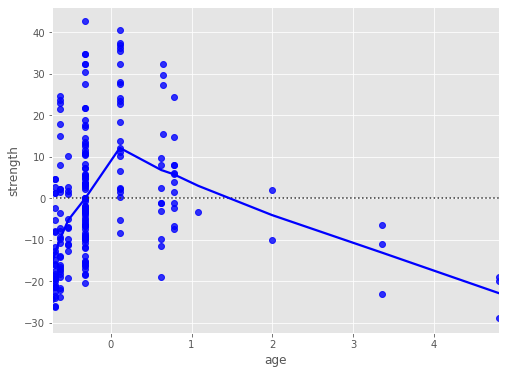

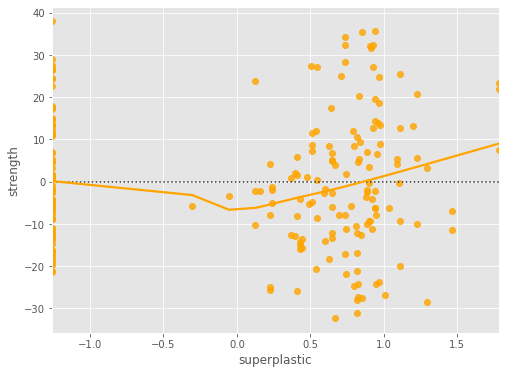

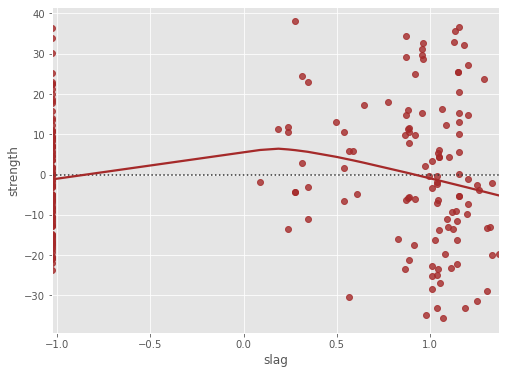

In [ ]:
#Checking the residuals of each Predictor
#Ideal scenario - No visible structure should be seen in lowess smoother

#Checking the important features `water_cement_ratio` and `age`
fig = plt.figure(figsize=(8,6))
sns.residplot(x= X_val['water_cement_ratio'], y= y_val, color='green', lowess=True )

fig = plt.figure(figsize=(8,6))
sns.residplot(x= X_val['age'], y= y_val, color='blue', lowess=True )

fig = plt.figure(figsize=(8,6))
sns.residplot(x= X_val['superplastic'], y= y_val, color='orange', lowess=True )

fig = plt.figure(figsize=(8,6))
sns.residplot(x= X_val['slag'], y= y_val, color='brown', lowess=True )

- Residual plots violate the intrinsic assumption of Linear Models that residuals would be random and doesn't exhibit heteroskedasticity. 

##### Plotting the higher order of Polynomials to understand Linear Model Assumptions

In [ ]:
#Helper function to plot Regression Plots for Predictors vs Target with given Polynomial Degree
def fit_polynomial(n_degree):
    p = np.polyfit(X_train['water_cement_ratio'], y_train, deg=n_degree)
    X_train['fit'] = np.polyval(p, X_train['water_cement_ratio'])
    sns.regplot(X_train['water_cement_ratio'], y_train, fit_reg=False)
    return plt.plot(X_train['water_cement_ratio'], X_train['fit'], label='fit')

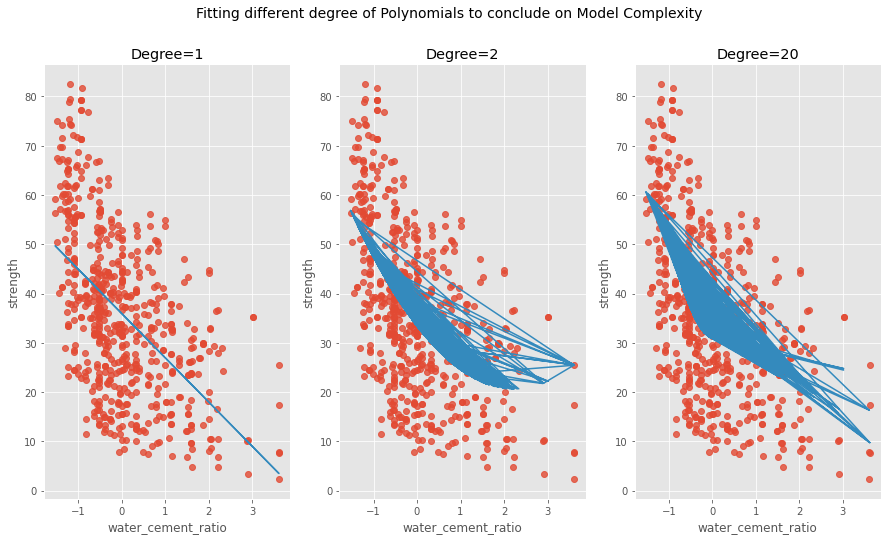

In [ ]:
f, ((ax1,ax2,ax3)) = plt.subplots(1, 3, figsize = (15, 8))
f.suptitle('Fitting different degree of Polynomials to conclude on Model Complexity', fontsize = 14)

plt.subplot(ax1)
fit_polynomial(1)
plt.title('Degree=1')

plt.subplot(ax2)
fit_polynomial(2)
plt.title('Degree=2')

plt.subplot(ax3)
fit_polynomial(10)
plt.title('Degree=20')

X_train = X_train.drop(columns='fit')

In [ ]:
rmse_df = pd.DataFrame(columns=['degree', 'rmse_train', 'rmse_val'])

def get_rmse(y, y_fit):
    return np.sqrt(mean_squared_error(y, y_fit))

for i in range(1,20):
    p = np.polyfit(X_train['water_cement_ratio'], y_train, deg=i)
    rmse_df.loc[i-1] = [i, 
                        get_rmse(y_train, np.polyval(p, X_train['water_cement_ratio'])), 
                        get_rmse(y_val, np.polyval(p, X_val['water_cement_ratio']))
                       ]

In [ ]:
rmse_df

degree  rmse_train   rmse_val
0      1.0   14.065837  15.293120
1      2.0   13.635942  14.593372
2      3.0   13.409363  14.315404
3      4.0   13.382672  14.349907
4      5.0   13.381700  14.350334
5      6.0   13.340273  14.368166
6      7.0   13.336238  14.391429
7      8.0   13.330018  14.396066
8      9.0   13.320632  14.449220
9     10.0   13.308120  14.446808
10    11.0   13.306543  14.444971
11    12.0   13.293541  14.501509
12    13.0   13.248190  14.713410
13    14.0   13.248188  14.713184
14    15.0   13.234598  14.679688
15    16.0   13.228791  14.702419
16    17.0   13.228104  14.706898
17    18.0   13.217768  14.776444
18    19.0   13.217750  14.774522

Text(0, 0.5, 'RMSE')

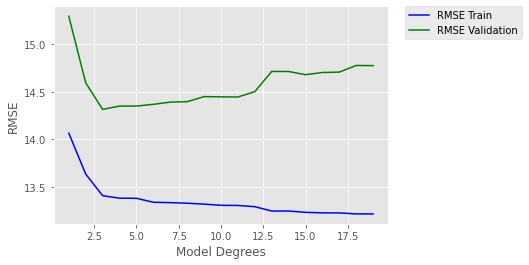

In [ ]:
#Plotting the rmse for both train and validation set for different degrees of Polynomial

plt.plot(rmse_df['degree'], rmse_df['rmse_train'], label='RMSE Train', color='b')
plt.plot(rmse_df['degree'], rmse_df['rmse_val'], label='RMSE Validation', color='g')

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.);
plt.xlabel('Model Degrees')
plt.ylabel('RMSE')

- We could see that higher order fit suits more to the dataset in hand. 
- Polynomial Degree of 3 (approx) seems to suit the given dataset - where RMSE is minimum in both train and validation set.
- Hence, simple Linear models will not be sufficient & it will be better to try out Tree based / Ensemble models for the given dataset.

## Step 7: Feature Importance & Feature Selection

Let us use RandomForestRegressor since tree-based baseline model has been the best of the lot.

In [ ]:
rf_reg = RandomForestRegressor(
    n_estimators=100, 
    criterion='mse', 
    bootstrap=True, 
    oob_score=True, 
    n_jobs=-1, 
    random_state=24
    )

In [ ]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=24)

In [ ]:
y_pred_rfr = rf_reg.predict(X_val)

In [ ]:
rf_reg.score(X_train, y_train)

0.982042159608117

In [ ]:
rf_reg.oob_score_

0.8969945881526643

In [ ]:
rmse_rfr = np.sqrt(mean_squared_error(y_val, y_pred_rfr))
mae_rfr = mean_absolute_error(y_val, y_pred_rfr)
r2_rfr = r2_score(y_val, y_pred_rfr)

In [ ]:
print("Model\t\t\t RMSE \t\t MAE \t\t R2")
print("""RF Regressor \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(rmse_rfr, mae_rfr, r2_rfr))

Model			 RMSE 		 MAE 		 R2
RF Regressor 		 5.43 		3.85 		0.90


### Feature Selection by Feature Importances

In [ ]:
def plot_feature_importance(reg_model):
  feature_rank = pd.DataFrame({
      'feature' : X_train.columns,
      'importance' : reg_model.feature_importances_.round(3)     
      }
  )

  feature_rank = feature_rank.sort_values('importance', ascending=False)

  print("Amount of variance explained by the predictors\n")

  feature_rank['cumulative_sum'] = feature_rank['importance'].cumsum()*100
    
  plt.figure(figsize=(8,6))
  sns.barplot(y='feature', x='importance', data=feature_rank)
  plt.title('Feature Importances Plot')
  plt.xlabel('Feature Importance from Regressor')
  plt.show()

  return feature_rank

Amount of variance explained by the predictors



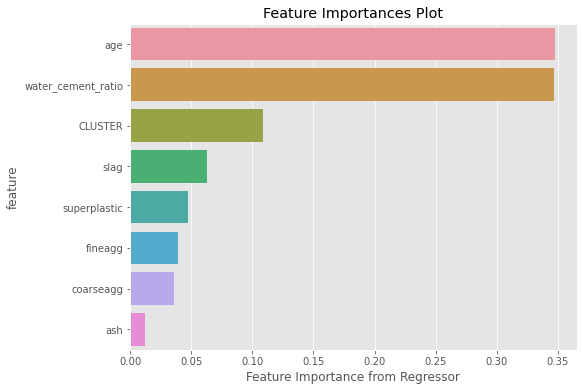

feature  importance  cumulative_sum
5                 age       0.348            34.8
6  water_cement_ratio       0.347            69.5
7             CLUSTER       0.109            80.4
0                slag       0.063            86.7
2        superplastic       0.047            91.4
4             fineagg       0.039            95.3
3           coarseagg       0.036            98.9
1                 ash       0.012           100.1

In [ ]:
plot_feature_importance(rf_reg)

In [ ]:
feature_selected_by_fi = ['water_cement_ratio', 'age', 'slag', 'superplastic']

### Feature Selection by Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance

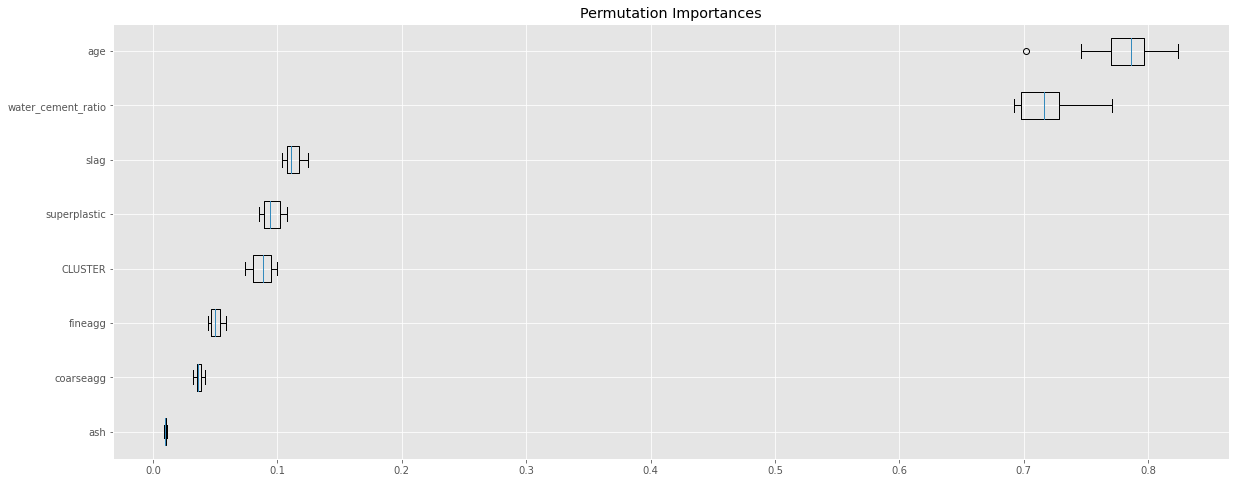

In [ ]:
result = permutation_importance(rf_reg, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(16,8))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx])
plt.title("Permutation Importances")
plt.show()

### Model-based Feature Selection

##### SelectFromModel Scikit-Learn

In [ ]:
sfm = SelectFromModel(estimator=rf_reg)
sfm.fit(X_train, y_train)
X_train_sfm = sfm.transform(X_train)

support = sfm.get_support()
col = X_train.columns
feature_selected_by_sfm = [x for x, y in zip(col, support) if y == True]

print(feature_selected_by_sfm)

['age', 'water_cement_ratio']


##### SequentialFeatureSelector MLXtend

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.9s finished

[2020-11-21 22:02:35] Features: 1/4 -- score: 0.3790929450847576[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.0s finished

[2020-11-21 22:02:40] Features: 2/4 -- score: 0.6777904747692061[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.4s finished

[2020-11-21 22:02:44] Features: 3/4 -- score: 0.8258205913263741[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

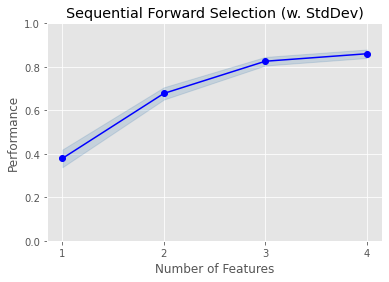

In [ ]:
sfs = SFS(rf_reg, 
          k_features=4, 
          forward=True, 
          floating=False, 
          scoring='r2',
          verbose=2,
          cv=5)

sfs = sfs.fit(X_train, y_train)

plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.0, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.show()

In [ ]:
columnList = list(X_train.columns)
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)
feature_selected_by_sfs = [columnList[i] for i in feat_cols] 
print(feature_selected_by_sfs)

[0, 1, 5, 6]
['slag', 'ash', 'age', 'water_cement_ratio']


### Consensus feature selection from all the methods

In [ ]:
feature_selected_by_fi = set(feature_selected_by_fi)
feature_selected_by_sfm = set(feature_selected_by_sfm)
feature_selected_by_sfs = set(feature_selected_by_sfs)

feature_selected = feature_selected_by_fi.union(feature_selected_by_sfm.union(feature_selected_by_sfs))

print('Features Selected soft selection : ', feature_selected)

Features Selected soft selection :  {'ash', 'water_cement_ratio', 'age', 'slag', 'superplastic'}


## Step 8: Model Building & Hyperparameter Tuning on Train & Validation set

In [ ]:
#Helper function to Build & Evaluate the Model
def build_regressor(reg_model, Xs, ys):
  y_pred = reg_model.predict(Xs)
  print('Model Score (Adjusted R2) of Train set : ', reg_model.score(X_train, y_train).round(3))
  #print('\nOut of Bag Score : ', reg_model.oob_score_.round(3))
  print('\n')
  rmse = np.sqrt(mean_squared_error(ys, y_pred))
  mae = mean_absolute_error(ys, y_pred)
  r2 = r2_score(ys, y_pred)

  print("Model\t\t\t\t RMSE \t\t MAE \t\t R2")
  print("""Regressor on Validation Set \t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(rmse, mae, r2))
  print('\n')

  # Predicted vs Ground-Truth Plot for the Regressor
  plt.figure(figsize=(8,6))

  plt.scatter(y_pred, ys, s=20)
  plt.plot([ys.min(), ys.max()], [ys.min(), ys.max()], 'k--', lw=2)
  plt.ylabel("True")
  plt.xlabel("Predicted")

  plt.title("Predicted vs Ground-Truth Plot\n\n")
  plt.show()

  return y_pred, rmse, mae, r2 

In [ ]:
# Helper function to calculate & plot Cross Validation Score

def plot_cross_val_score(reg_model,  Xs, ys, cv=10, alpha=0.95, scoring = 'r2'):
  model_cv_score = cross_val_score(reg_model, Xs, ys, cv = cv, scoring = scoring)
  model_cv_score_mean = model_cv_score.mean()
  model_cv_score_sd = model_cv_score.std()
  print('Cross validation score (Mean): ', round(model_cv_score_mean, 3).astype(str))
  print('Cross validation score (Std Dev): ', round(model_cv_score_sd, 3).astype(str))
  conf_interval_lower = model_cv_score_mean - 2*model_cv_score_sd
  conf_interval_upper = model_cv_score_mean + 2*model_cv_score_sd
  print('CV Score Mean+-3SD : [',str(conf_interval_lower)+', '+str(conf_interval_upper)+']')

  plt.subplot(211)
  sns.distplot(model_cv_score)

  plt.subplot(212)
  sns.boxplot(model_cv_score)

  plt.suptitle("Cross Validation Score Distribution")

  # Confidence Interval of alpha %                           
  p = ((1.0-alpha)/2.0) * 100             
  lower = max(0.0, np.percentile(model_cv_score, p))  
  p = (alpha+((1.0-alpha)/2.0)) * 100
  upper = min(1.0, np.percentile(model_cv_score, p))
  print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

  plt.show()

  return model_cv_score

### RandomForestRegressor

Model Score (Adjusted R2) of Train set :  0.982


Model				 RMSE 		 MAE 		 R2
Regressor on Validation Set 	 5.43 		3.85 		0.90




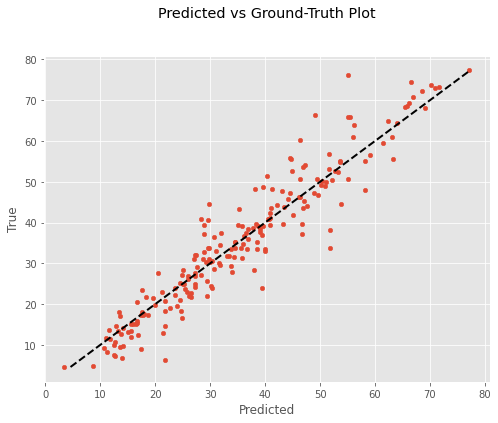

In [ ]:
y_pred_rfr, rmse_rfr, mae_rfr, r2_rfr = build_regressor(rf_reg, X_val, y_val)

Amount of variance explained by the predictors



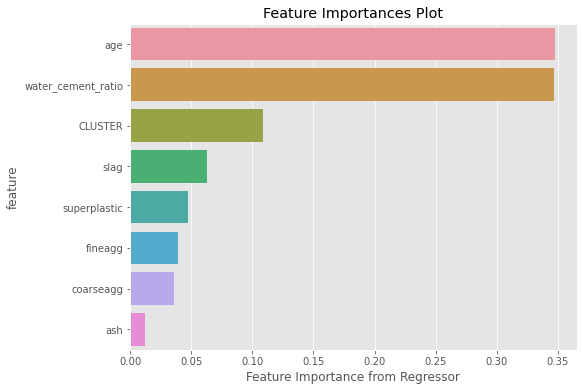

feature  importance  cumulative_sum
5                 age       0.348            34.8
6  water_cement_ratio       0.347            69.5
7             CLUSTER       0.109            80.4
0                slag       0.063            86.7
2        superplastic       0.047            91.4
4             fineagg       0.039            95.3
3           coarseagg       0.036            98.9
1                 ash       0.012           100.1

In [ ]:
plot_feature_importance(rf_reg)

#### RF Regressor with Hyperparameter Tuning

In [ ]:
param_grid_rf = {
    'criterion' : ['mse', 'mae'], #Impurity split criteria
    'n_estimators' : [100, 200, 300, 500],
    'max_depth' : [3,4,5,6] #Tree Depth
}

rfr_tuned = GridSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=24, verbose=2),
    param_grid=param_grid_rf, 
    scoring='r2',
    cv=KFold(n_splits=10),
    n_jobs=-1
    )

In [ ]:
rfr_tuned.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200building tree 8 of 200

building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200building tree 41 of 200

building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(n_jobs=-1, random_state=24,
                                             verbose=2),
             n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 500],
                         'warm_start': [True, False]},
             scoring='r2')

In [ ]:
rfr_tuned.best_params_

{'criterion': 'mae', 'max_depth': 6, 'n_estimators': 200, 'warm_start': True}

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Score (Adjusted R2) of Train set :  0.917


Model				 RMSE 		 MAE 		 R2
Regressor on Validation Set 	 6.38 		4.91 		0.86




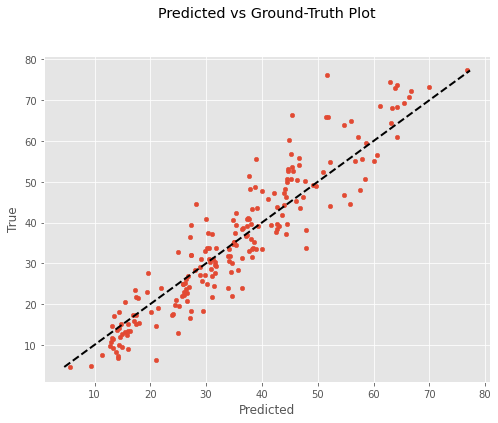

In [ ]:
y_pred_rfr_tuned, rmse_rfr_tuned, mae_rfr_tuned, r2_rfr_tuned = build_regressor(rfr_tuned, X_val, y_val)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n

Cross validation score (Mean):  0.773
Cross validation score (Std Dev):  0.077
CV Score Mean+-3SD : [ 0.618214151207358, 0.9271377435632064]
95.0 confidence interval 64.5% and 87.5%


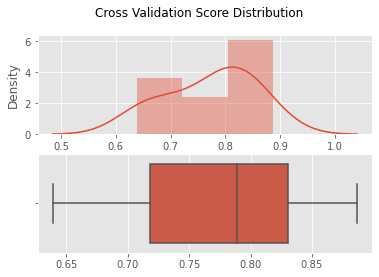

In [ ]:
rfr_cv_score = plot_cross_val_score(rfr_tuned,  X_val, y_val, cv=10, alpha=0.95, scoring = 'r2')

### XGB Regressor

In [ ]:
xgbr = xgb.XGBRegressor(
    booster='gbtree',  
    random_state=24, 
    n_jobs=-1,
    gamma=0,
    importance_type='gain', 
    learning_rate=0.1
)

In [ ]:
xgbr.fit(
    X_train, 
    y_train,
    verbose=True,
    early_stopping_rounds=10,  #Stop the Tree Growth when there is no visible improvement for 10 iterations
    eval_metric='rmse',
    eval_set=[(X_train, y_train), (X_val, y_val)]
    )

[0]	validation_0-rmse:35.50664	validation_1-rmse:35.30619
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:32.17999	validation_1-rmse:32.15121
[2]	validation_0-rmse:29.18495	validation_1-rmse:29.24598
[3]	validation_0-rmse:26.49638	validation_1-rmse:26.63189
[4]	validation_0-rmse:24.07676	validation_1-rmse:24.22625
[5]	validation_0-rmse:21.88730	validation_1-rmse:22.12069
[6]	validation_0-rmse:19.91555	validation_1-rmse:20.22836
[7]	validation_0-rmse:18.15525	validation_1-rmse:18.52573
[8]	validation_0-rmse:16.56103	validation_1-rmse:17.03556
[9]	validation_0-rmse:15.10954	validation_1-rmse:15.62971
[10]	validation_0-rmse:13.81015	validation_1-rmse:14.38725
[11]	validation_0-rmse:12.64528	validation_1-rmse:13.24993
[12]	validation_0-rmse:11.59406	validation_1-rmse:12.28435
[13]	validation_0-rmse:10.65263	validation_1-rmse:11.37942
[14]	validation_0-rmse:9.

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=24,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Model Score (Adjusted R2) of Train set :  0.989


Model				 RMSE 		 MAE 		 R2
Regressor on Validation Set 	 4.60 		3.20 		0.93




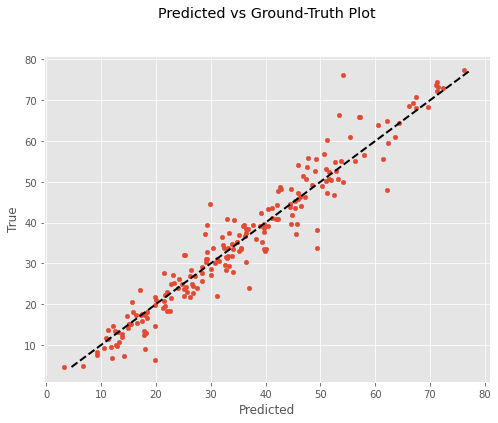

In [ ]:
y_pred_xgbr, rmse_xgbr, mae_xgbr, r2_xgbr = build_regressor(xgbr, X_val, y_val)

Amount of variance explained by the predictors



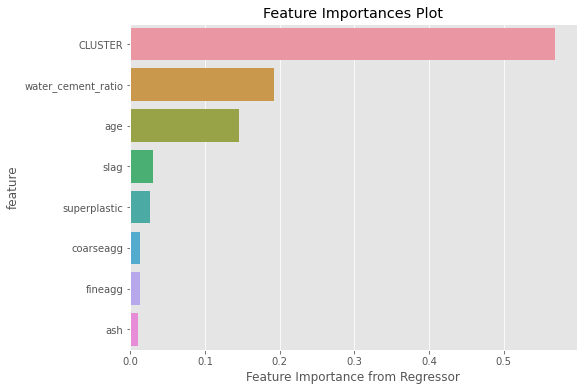

feature  importance  cumulative_sum
7             CLUSTER       0.569       56.900002
6  water_cement_ratio       0.192       76.100006
5                 age       0.146       90.700005
0                slag       0.031       93.800011
2        superplastic       0.027       96.500008
3           coarseagg       0.013       97.800011
4             fineagg       0.013       99.100014
1                 ash       0.010      100.100014

In [ ]:
plot_feature_importance(xgbr)

#### XGB Regressor with Hyperparameter Tuning

In [ ]:
param_grid = {
    'n_estimators' : [100, 200, 300, 500],
    'max_depth' : [3,4,5,6], #Tree Depth
    'learning_rate' : [0.1,0.01,0.05], #Shrinkage Parameter to avoid being Overfit
    'gamma' : [0,0.25,1.0], #Regularization Parameter
    'reg_lambda' : [0,1.0,10.0] #Regularization Parameter
}

xgbr_tuned = GridSearchCV(
    xgb.XGBRegressor(booster='gbtree', objective='reg:squarederror'),
    param_grid=param_grid, 
    scoring='r2',
    cv=KFold(n_splits=10),
    n_jobs=-1
    )

In [ ]:
xgbr_tuned.fit(
    X_train, 
    y_train,
    verbose=True,
    early_stopping_rounds=10,  #Stop the Tree Growth when there is no visible improvement for 10 iterations
    eval_metric='rmse',
    eval_set=[(X_train, y_train), (X_val, y_val)]
    )

[0]	validation_0-rmse:35.56903	validation_1-rmse:35.35297
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:32.31321	validation_1-rmse:32.21752
[2]	validation_0-rmse:29.39855	validation_1-rmse:29.24589
[3]	validation_0-rmse:26.78907	validation_1-rmse:26.75005
[4]	validation_0-rmse:24.45123	validation_1-rmse:24.40243
[5]	validation_0-rmse:22.32931	validation_1-rmse:22.24762
[6]	validation_0-rmse:20.45621	validation_1-rmse:20.33900
[7]	validation_0-rmse:18.76282	validation_1-rmse:18.70053
[8]	validation_0-rmse:17.25845	validation_1-rmse:17.23185
[9]	validation_0-rmse:15.90760	validation_1-rmse:15.88840
[10]	validation_0-rmse:14.72063	validation_1-rmse:14.77298
[11]	validation_0-rmse:13.66071	validation_1-rmse:13.73216
[12]	validation_0-rmse:12.66084	validation_1-rmse:12.78357
[13]	validation_0-rmse:11.82973	validation_1-rmse:11.98815
[14]	validation_0-rmse:11

[140]	validation_0-rmse:3.33914	validation_1-rmse:4.95204
[141]	validation_0-rmse:3.33689	validation_1-rmse:4.95113
[142]	validation_0-rmse:3.32737	validation_1-rmse:4.94820
[143]	validation_0-rmse:3.32064	validation_1-rmse:4.94556
[144]	validation_0-rmse:3.31475	validation_1-rmse:4.94846
[145]	validation_0-rmse:3.29930	validation_1-rmse:4.93812
[146]	validation_0-rmse:3.29534	validation_1-rmse:4.93684
[147]	validation_0-rmse:3.29336	validation_1-rmse:4.93481
[148]	validation_0-rmse:3.28920	validation_1-rmse:4.93161
[149]	validation_0-rmse:3.28492	validation_1-rmse:4.93317
[150]	validation_0-rmse:3.27943	validation_1-rmse:4.92842
[151]	validation_0-rmse:3.27532	validation_1-rmse:4.92347
[152]	validation_0-rmse:3.26617	validation_1-rmse:4.91677
[153]	validation_0-rmse:3.26440	validation_1-rmse:4.91638
[154]	validation_0-rmse:3.25623	validation_1-rmse:4.91873
[155]	validation_0-rmse:3.25251	validation_1-rmse:4.91362
[156]	validation_0-rmse:3.24590	validation_1-rmse:4.91143
[157]	validati

[282]	validation_0-rmse:2.56203	validation_1-rmse:4.64757
[283]	validation_0-rmse:2.55908	validation_1-rmse:4.64359
[284]	validation_0-rmse:2.55791	validation_1-rmse:4.64259
[285]	validation_0-rmse:2.55440	validation_1-rmse:4.63914
[286]	validation_0-rmse:2.55266	validation_1-rmse:4.63693
[287]	validation_0-rmse:2.55039	validation_1-rmse:4.63643
[288]	validation_0-rmse:2.54595	validation_1-rmse:4.63129
[289]	validation_0-rmse:2.54307	validation_1-rmse:4.63111
[290]	validation_0-rmse:2.54026	validation_1-rmse:4.62442
[291]	validation_0-rmse:2.53774	validation_1-rmse:4.62177
[292]	validation_0-rmse:2.53634	validation_1-rmse:4.62393
[293]	validation_0-rmse:2.53398	validation_1-rmse:4.62331
[294]	validation_0-rmse:2.52861	validation_1-rmse:4.62284
[295]	validation_0-rmse:2.52066	validation_1-rmse:4.62290
[296]	validation_0-rmse:2.51940	validation_1-rmse:4.62328
[297]	validation_0-rmse:2.51649	validation_1-rmse:4.62061
[298]	validation_0-rmse:2.51158	validation_1-rmse:4.62070
[299]	validati

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=n...
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 500],
                         'reg_lambda': [0, 1.0, 10.0]},
             scoring='r2')

In [ ]:
xgbr_tuned.best_params_

{'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 500,
 'reg_lambda': 1.0}

Model Score (Adjusted R2) of Train set :  0.982


Model				 RMSE 		 MAE 		 R2
Regressor on Validation Set 	 4.49 		3.12 		0.93




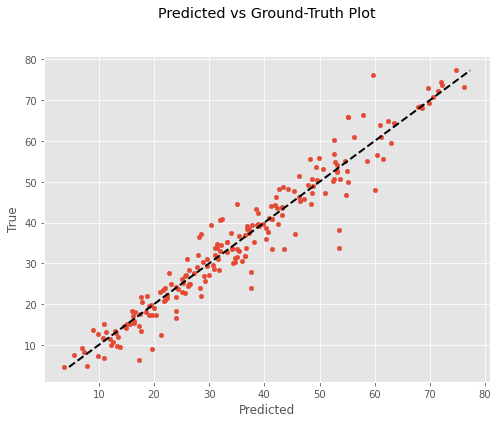

In [ ]:
y_pred_xgbr_tuned, rmse_xgbr_tuned, mae_xgbr_tuned, r2_xgbr_tuned = build_regressor(xgbr_tuned, X_val, y_val)

Cross validation score (Mean):  0.869
Cross validation score (Std Dev):  0.078
CV Score Mean+-3SD : [ 0.7140433081564227, 1.024146973790117]
95.0 confidence interval 69.4% and 92.7%


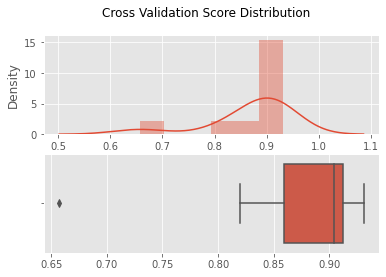

In [ ]:
xgbr_cv_score = plot_cross_val_score(xgbr_tuned,  X_val, y_val, cv=10, alpha=0.95, scoring = 'r2')

### LightGBM Regressor

In [ ]:
lgbmr = lgb.LGBMRegressor(
    boosting_type='gbdt', 
    max_depth=- 1, 
    learning_rate=0.1, 
    n_estimators=100, 
    objective='regression', 
    reg_alpha=0.0, #L1 Regularisation
    reg_lambda=0.0, #L2 Regularisation
    random_state=24, 
    n_jobs=- 1, 
    silent=False, 
    importance_type='gain'
)

In [ ]:
lgbmr.fit(
    X_train, 
    y_train, 
    eval_set=[(X_train, y_train), (X_val, y_val)], 
    eval_metric='rmse', 
    early_stopping_rounds=10, 
    verbose=True
)

[1]	training's rmse: 15.3463	training's l2: 235.508	valid_1's rmse: 15.8679	valid_1's l2: 251.789
Training until validation scores don't improve for 10 rounds
[2]	training's rmse: 14.1495	training's l2: 200.209	valid_1's rmse: 14.742	valid_1's l2: 217.326
[3]	training's rmse: 13.0901	training's l2: 171.351	valid_1's rmse: 13.762	valid_1's l2: 189.393
[4]	training's rmse: 12.1573	training's l2: 147.799	valid_1's rmse: 12.8748	valid_1's l2: 165.76
[5]	training's rmse: 11.2912	training's l2: 127.491	valid_1's rmse: 12.0558	valid_1's l2: 145.343
[6]	training's rmse: 10.4978	training's l2: 110.205	valid_1's rmse: 11.3012	valid_1's l2: 127.716
[7]	training's rmse: 9.82237	training's l2: 96.4789	valid_1's rmse: 10.6591	valid_1's l2: 113.616
[8]	training's rmse: 9.22694	training's l2: 85.1364	valid_1's rmse: 10.0736	valid_1's l2: 101.477
[9]	training's rmse: 8.6544	training's l2: 74.8987	valid_1's rmse: 9.50705	valid_1's l2: 90.3841
[10]	training's rmse: 8.20439	training's l2: 67.3121	valid_1'

LGBMRegressor(importance_type='gain', objective='regression', random_state=24,
              silent=False)

Model Score (Adjusted R2) of Train set :  0.976


Model				 RMSE 		 MAE 		 R2
Regressor on Validation Set 	 4.54 		3.20 		0.93




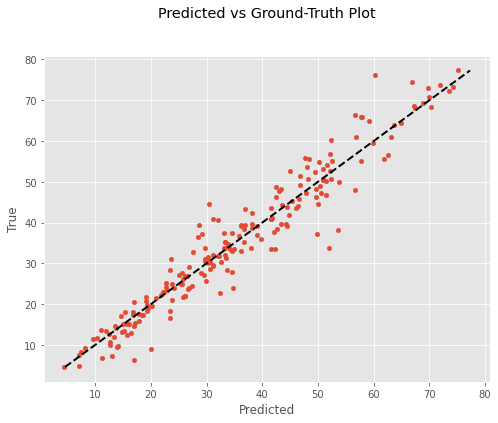

In [ ]:
y_pred_lgbmr, rmse_lgbmr, mae_lgbmr, r2_lgbmr = build_regressor(lgbmr, X_val, y_val)

Amount of variance explained by the predictors



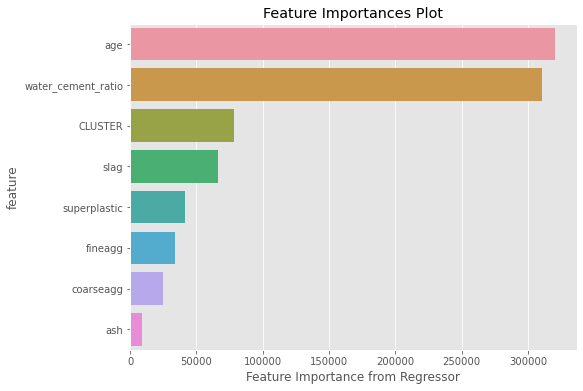

feature  importance  cumulative_sum
5                 age  320707.904      32070790.4
6  water_cement_ratio  310961.627      63166953.1
7             CLUSTER   78375.261      71004479.2
0                slag   65958.125      77600291.7
2        superplastic   41181.565      81718448.2
4             fineagg   33647.383      85083186.5
3           coarseagg   24959.522      87579138.7
1                 ash    8679.036      88447042.3

In [ ]:
plot_feature_importance(lgbmr)

#### LightGBM Regressor with Hyperparameter Tuning

In [ ]:
param_grid_lgb = {
    'n_estimators' : [100, 200, 300, 500],
    'max_depth' : [3,4,5,6], #Tree Depth
    'learning_rate' : [0.1,0.01,0.05], #Shrinkage Parameter to avoid being Overfit
    'reg_alpha' : [0,1.0,10.0], #Regularization Parameter
    'reg_lambda' : [0,1.0,10.0] #Regularization Parameter
}

lgbmr_tuned = GridSearchCV(
    lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', random_state=24),
    param_grid=param_grid_lgb, 
    scoring='r2',
    cv=KFold(n_splits=10),
    n_jobs=-1
    )

In [ ]:
lgbmr_tuned.fit(
    X_train, 
    y_train, 
    eval_set=[(X_train, y_train), (X_val, y_val)], 
    eval_metric='rmse', 
    early_stopping_rounds=10, 
    verbose=True
)

[1]	training's rmse: 15.5969	training's l2: 243.265	valid_1's rmse: 16.151	valid_1's l2: 260.855
Training until validation scores don't improve for 10 rounds
[2]	training's rmse: 14.6214	training's l2: 213.785	valid_1's rmse: 15.1994	valid_1's l2: 231.02
[3]	training's rmse: 13.7566	training's l2: 189.244	valid_1's rmse: 14.3235	valid_1's l2: 205.162
[4]	training's rmse: 12.9342	training's l2: 167.294	valid_1's rmse: 13.5615	valid_1's l2: 183.915
[5]	training's rmse: 12.221	training's l2: 149.353	valid_1's rmse: 12.8292	valid_1's l2: 164.587
[6]	training's rmse: 11.5709	training's l2: 133.886	valid_1's rmse: 12.2555	valid_1's l2: 150.197
[7]	training's rmse: 10.995	training's l2: 120.889	valid_1's rmse: 11.662	valid_1's l2: 136.003
[8]	training's rmse: 10.4603	training's l2: 109.417	valid_1's rmse: 11.1881	valid_1's l2: 125.174
[9]	training's rmse: 9.94432	training's l2: 98.8896	valid_1's rmse: 10.6465	valid_1's l2: 113.347
[10]	training's rmse: 9.5239	training's l2: 90.7046	valid_1's 

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LGBMRegressor(objective='regression', random_state=24),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 500],
                         'reg_alpha': [0, 1.0, 10.0],
                         'reg_lambda': [0, 1.0, 10.0]},
             scoring='r2')

In [ ]:
lgbmr_tuned.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 500,
 'reg_alpha': 0,
 'reg_lambda': 10.0}

Model Score (Adjusted R2) of Train set :  0.975


Model				 RMSE 		 MAE 		 R2
Regressor on Validation Set 	 4.72 		3.37 		0.92




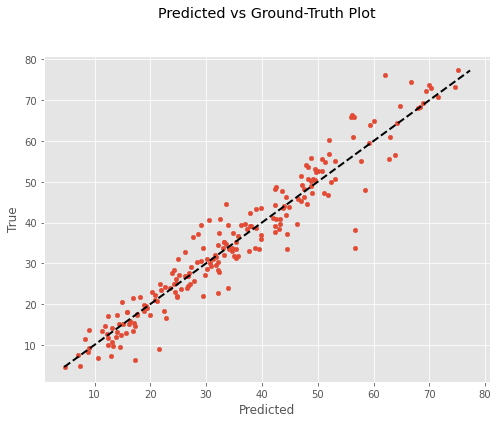

In [ ]:
y_pred_lgbmr_tuned, rmse_lgbmr_tuned, mae_lgbmr_tuned, r2_lgbmr_tuned = build_regressor(lgbmr_tuned, X_val, y_val)

Cross validation score (Mean):  0.814
Cross validation score (Std Dev):  0.084
CV Score Mean+-3SD : [ 0.6447945285030795, 0.9824629214222119]
95.0 confidence interval 65.9% and 90.6%


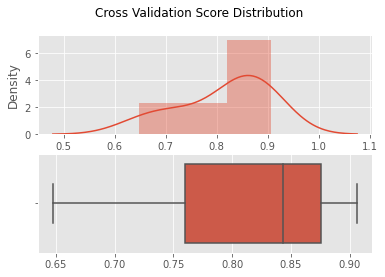

In [ ]:
lgbmr_cv_score = plot_cross_val_score(lgbmr_tuned,  X_val, y_val, cv=10, alpha=0.95, scoring = 'r2')

## Step 9: Model Selection & Evaluation on Test set

### Model Selection using Cross Validation

#### Plotting the Learning Curve

Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html


In [ ]:
def plot_learning_curve(estimator, X, y,  ax, ylim = None, cv = None, n_jobs = 1,
                        train_sizes = np.linspace(.1, 1.0, 5), name = 'Learning Curve'):    
    if ylim is not None:
        plt.ylim(*ylim)
        
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = cv, n_jobs = n_jobs, 
                                                            train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                     alpha = 0.1, color = '#ff9124')
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                     alpha = 0.1, color = '#2492ff')

    ax.plot(train_sizes, train_scores_mean, 'o-', color = '#ff9124', label = 'Training score')
    ax.plot(train_sizes, test_scores_mean, 'o-', color ='#2492ff', label = 'Cross-validation score')
    ax.set_title(name, fontsize = 14)
    ax.set_xlabel('Training size')
    ax.set_ylabel('Score')
    ax.grid(True)
    ax.legend(loc = 'best')

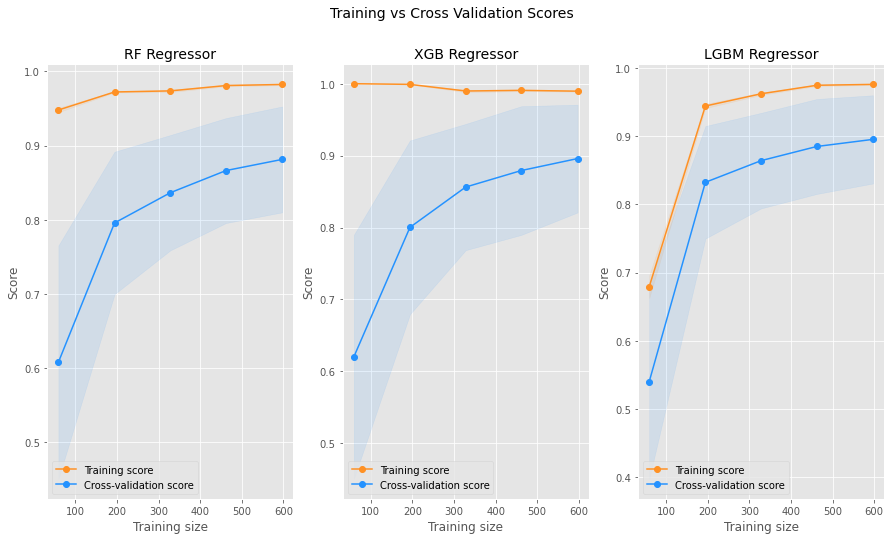

In [ ]:
# Plot training vs cross validation scores
cv = KFold(n_splits = 30, random_state = random_state)

f, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (15, 8))
f.suptitle('Training vs Cross Validation Scores', fontsize = 14)

plot_learning_curve(rf_reg, X_train, y_train, cv = cv, n_jobs = -1, ax = ax1, 
                    name = 'RF Regressor')

plot_learning_curve(xgbr, X_train, y_train, cv = cv, n_jobs = -1, ax = ax2, 
                    name = 'XGB Regressor')

plot_learning_curve(lgbmr, X_train, y_train, cv = cv, n_jobs = 1, ax = ax3,
                    name = 'LGBM Regressor')

**Observations:**
- Learning Curves of three regressors show that RF and XGB both have random initialisation in terms of training score, but converged with sufficient training size.
- XGB Regressor exhibits better performance than RF Regressor in terms of Validation set prediction. 
- LGBM Regressor exhibits uniformity across both Train and Validation datasets, showing that the Bias-Variance tradeoff is better handled by LGBM among the three. 

#### Plotting the Cross Validation scores between RF, XGB and LGBM

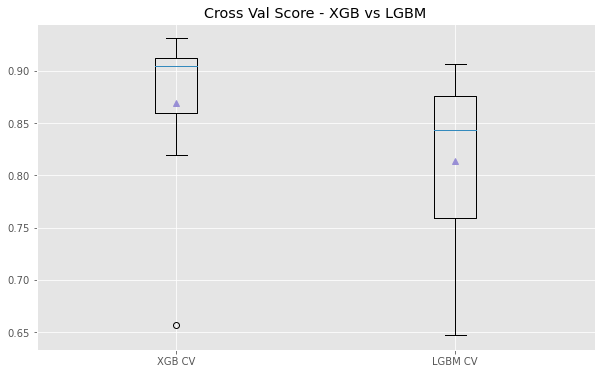

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot([xgbr_cv_score, lgbmr_cv_score],
            showmeans=True,
            labels=['XGB CV','LGBM CV'])
plt.title('Cross Val Score - XGB vs LGBM')
plt.show()

- Based on the Cross Validation Score, we could see that 'XGB Regressor' is having a better performance range than LGBM Regressor.

In [ ]:
metrics = {'Regressor':['Linear Regression',
                         'Linear Regression - Polynomial Features',
                         'Support Vector Machine RBF Kernel',
                         'Decision Tree Regressor',
                         'Random Forest Regressor',
                        'Random Forest Regressor - Tuned',
                         'XGBoost Regressor',
                        'XGB Regressor - Tuned',
                         'LightGBM Regressor',
                        'LightGBM Regressor - Tuned'],
           'RMSE' : [rmse_lr, rmse_poly_lr, rmse_svr, rmse_dtr, rmse_rfr, rmse_rfr_tuned, rmse_xgbr, rmse_xgbr_tuned, rmse_lgbmr, rmse_lgbmr_tuned],
           'MAE' : [mae_lr, mae_poly_lr, mae_svr, mae_dtr, mae_rfr, mae_rfr_tuned, mae_xgbr, mae_xgbr_tuned, mae_lgbmr, mae_lgbmr_tuned],
           'R2' : [r2_lr, r2_poly_lr, r2_svr, r2_dtr, r2_rfr, r2_rfr_tuned, r2_xgbr, r2_xgbr_tuned, r2_lgbmr, r2_lgbmr_tuned]
          }
model_eval_metrics = pd.DataFrame(metrics)
model_eval_metrics = model_eval_metrics.set_index('Regressor')

In [ ]:
model_eval_metrics

RMSE       MAE        R2
Regressor                                                             
Linear Regression                        10.884346  8.732527  0.600217
Linear Regression - Polynomial Features   7.569204  5.878866  0.806661
Support Vector Machine RBF Kernel        10.436451  8.472344  0.632443
Decision Tree Regressor                   6.161474  4.169757  0.871888
Random Forest Regressor                   5.430297  3.848853  0.900490
XGBoost Regressor                         4.598941  3.200675  0.928627
XGB Regressor - Tuned                     4.488788  3.115504  0.932005
LightGBM Regressor                        4.541353  3.199917  0.930403

#### Hypothesis Testing using paired_ttest_5x2cv on Validation dataset

In [ ]:
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=xgbr, 
                          estimator2=lgbmr, 
                          X=X_val, 
                          y=y_val, 
                          scoring='r2', 
                          random_seed=24)

print(f'The P-value is = {p:.3f}')
print(f'The t-statistics is = {t:.3f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset.\nWe may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis.\n We may conclude that the performance of the two algorithms is not significantly different.')

The P-value is = 0.544
The t-statistics is = -0.651
Since p>0.05, we cannot reject the null hypothesis.
 We may conclude that the performance of the two algorithms is not significantly different.


### Model Evaluation on Test set

Model Score (Adjusted R2) of Train set :  0.917


Model				 RMSE 		 MAE 		 R2
Regressor on Validation Set 	 6.50 		4.99 		0.84




[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished


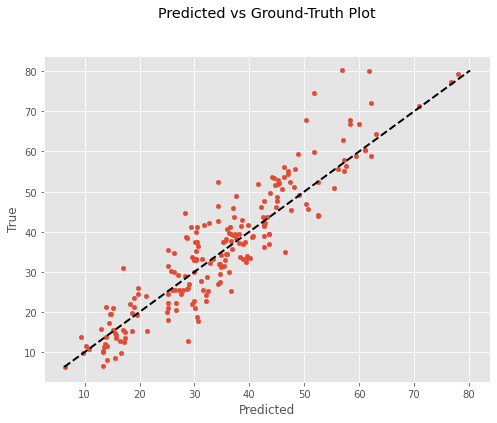

Model Score (Adjusted R2) of Train set :  0.982


Model				 RMSE 		 MAE 		 R2
Regressor on Validation Set 	 4.57 		3.18 		0.92




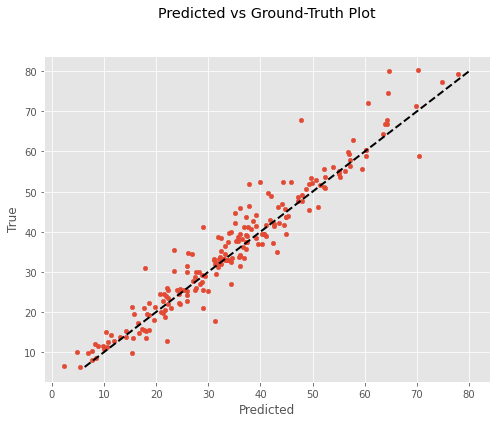

Model Score (Adjusted R2) of Train set :  0.975


Model				 RMSE 		 MAE 		 R2
Regressor on Validation Set 	 4.69 		3.18 		0.92




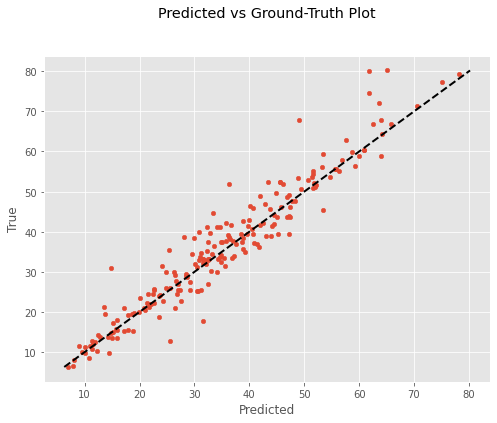

In [ ]:
y_pred_rfr_tuned_test, rmse_rfr_tuned_test, mae_rfr_tuned_test, r2_rfr_tuned_test = build_regressor(rfr_tuned, X_test, y_test)
y_pred_xgbr_tuned_test, rmse_xgbr_tuned_test, mae_xgbr_tuned_test, r2_xgbr_tuned_test = build_regressor(xgbr_tuned, X_test, y_test)
y_pred_lgbmr_tuned_test, rmse_lgbmr_tuned_test, mae_lgbmr_tuned_test, r2_lgbmr_tuned_test = build_regressor(lgbmr_tuned, X_test, y_test)

In [ ]:
metrics_test = {'Regressor on Test set':['Random Forest Regressor',
                         'XGBoost Regressor',
                         'LightGBM Regressor'],
           'RMSE' : [rmse_rfr_tuned_test, rmse_xgbr_tuned_test, rmse_lgbmr_tuned_test],
           'MAE' : [mae_rfr_tuned_test, mae_xgbr_tuned_test, mae_lgbmr_tuned_test],
           'R2' : [r2_rfr_tuned_test, r2_xgbr_tuned_test, r2_lgbmr_tuned_test]
          }
model_eval_metrics_test = pd.DataFrame(metrics_test)
model_eval_metrics_test = model_eval_metrics_test.set_index('Regressor on Test set')

model_eval_metrics_test

RMSE       MAE        R2
Regressor on Test set                                
Random Forest Regressor  6.497063  4.994276  0.838635
XGBoost Regressor        4.574537  3.180451  0.920004
LightGBM Regressor       4.691549  3.178575  0.915859

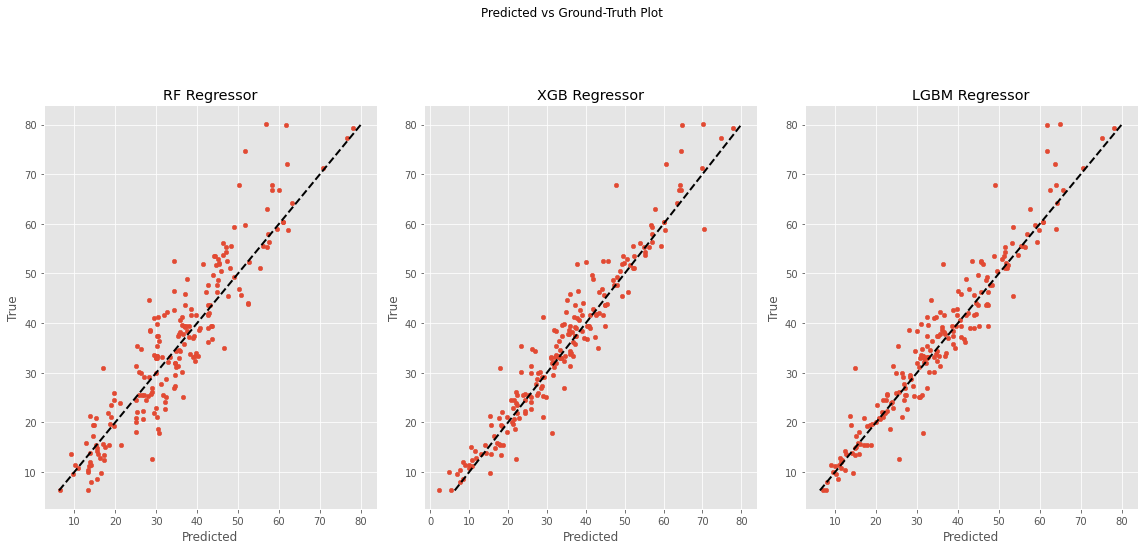

In [ ]:
# Predicted vs Ground-Truth Plot for all the Models
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8))

ax1.scatter(y_pred_rfr_tuned_test, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("RF Regressor")

ax2.scatter(y_pred_xgbr_tuned_test, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("XGB Regressor")

ax3.scatter(y_pred_lgbmr_tuned_test, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("LGBM Regressor")

fig.suptitle("Predicted vs Ground-Truth Plot\n\n")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

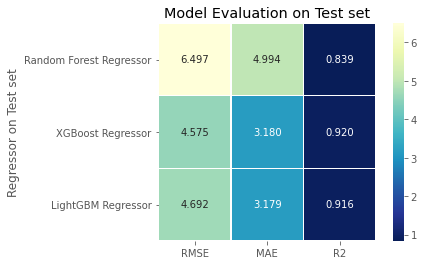

In [ ]:
sns.heatmap(model_eval_metrics_test, annot=True, linewidths=0.3, fmt='.3f', square=True, cmap='YlGnBu_r').set_title('Model Evaluation on Test set');

**In line with the Cross Validation scores of XGB Regressor, it is also the better performing Regressor for unseen Test dataset and is recommended as the best algorithm among the tested algorithms.**

********************************************************************************************************************************

### Building Pipeline for finding the Best Model

Let us validate our findings on XGB being the better performing model using Scikit-Learn Pipelines & GridSearchCV.

##### Fitting Pipeline on Train dataset

In [ ]:
# Instantiate a pipeline
pipe = Pipeline([("regressor", RandomForestRegressor())])

# Create parameter grid with learning algorithms and their hyperparameters
grid_param = [
                {
                    'regressor': [RandomForestRegressor(n_jobs=-1, random_state=24, verbose=2)],
                    'regressor__criterion': ['mse','mae'],
                    'regressor__n_estimators': [100,200,300,500],
                    'regressor__max_depth': [3,6,9]
                },
                {
                    'regressor': [xgb.XGBRegressor(booster='gbtree', objective='reg:squarederror')],
                    'regressor__n_estimators': [100,200,300,500],
                    'regressor__max_depth': [3,6,9],
                    'regressor__learning_rate' : [0.1,0.01,0.05],
                    'regressor__gamma' : [0,0.25,1.0],
                    'regressor__reg_lambda' : [0,1.0,10.0]
                },
                {
                    'regressor': [lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', random_state=24)],
                    'regressor__criterion': ['mse','mae'],
                    'regressor__n_estimators': [100,200,300,500],
                    'regressor__max_depth': [3,6,9],
                    'regressor__learning_rate' : [0.1,0.01,0.05],
                    'regressor__reg_alpha' : [0,0.25,1.0],
                    'regressor__reg_lambda' : [0,1.0,10.0]
                }
             ]
# Creating GridSearch of multiple models and fitting the Best Model 
gridsearch = GridSearchCV(pipe, grid_param, scoring='r2', cv=KFold(n_splits=10), verbose=0,n_jobs=-1) 
best_model = gridsearch.fit(X_train,y_train)

In [ ]:
print(best_model.best_estimator_)

Pipeline(steps=[('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0.25, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=500, n_jobs=0, num_parallel_tree=1,
                              random_state=0, reg_alpha=0, reg_lambda=1.0,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])


In [ ]:
print(best_model.best_params_)

{'regressor': XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=0.25,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=1.0,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), 'regressor__gamma': 0.25, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 500, 'regressor__reg_lambda': 1.0}


As expected, XGB Regressor is the best model among RF, XGB and LGBM for the given dataset.

##### Cross Validation Score using Validation set

Model Score (Adjusted R2) of Train set :  0.984


Model				 RMSE 		 MAE 		 R2
Regressor on Validation Set 	 4.46 		3.10 		0.93




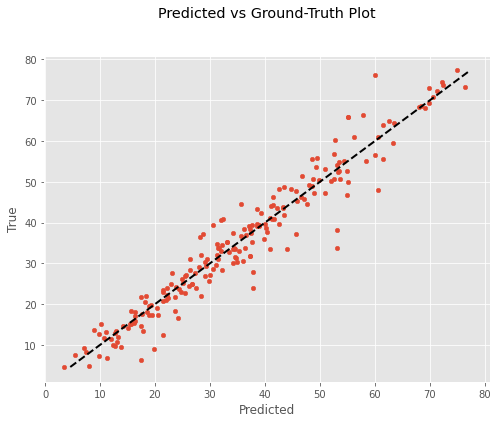

In [ ]:
y_pred_best_val, rmse_best_tuned_val, mae_best_tuned_val, r2_best_tuned_val = build_regressor(best_model, X_val, y_val)

Cross validation score (Mean):  0.875
Cross validation score (Std Dev):  0.054
CV Score Mean+-3SD : [ 0.7677006489579088, 0.9831638583035147]
95.0 confidence interval 76.1% and 92.7%


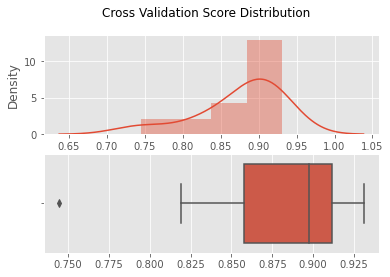

In [ ]:
best_cv_score = plot_cross_val_score(best_model,  X_val, y_val, cv=10, alpha=0.95, scoring = 'r2')

##### Model Evaluation on Test Dataset

Model Score (Adjusted R2) of Train set :  0.984


Model				 RMSE 		 MAE 		 R2
Regressor on Validation Set 	 4.51 		3.12 		0.92




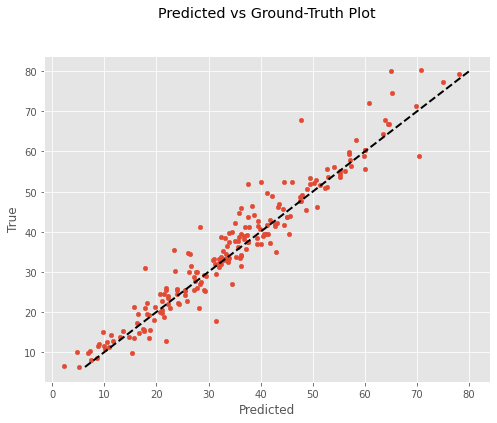

In [ ]:
y_pred_best_test, rmse_best_tuned_test, mae_best_tuned_test, r2_best_tuned_test = build_regressor(best_model, X_test, y_test)

## Step 10: Learnings and Summary

**Statistical Summary and Initial EDA:**
- Except for `age`, all other predictor features are of same scale measured in kg/m^3.
- `age` is measured in Number of days whereas `strength` is measured in MPa.
- `slag` and `ash` has skewed distributions with no values within the 25%, 50% quantiles. Distribution is also sparse considering the mean value of 73 and 54 respectively against corresponding Standard Deviations of 86 and 63 respectively. SD>Mean shows that the variance is skewed towards one of the tails.
- `superplastic` also is having skewed distribution with no values in 1st and 2d quantiles.
- `water` seems to be well distributed with values in all the quantiles & considering the min and max ranges.
- `age` is a discrete variable with values ranging from 1 to 365 days (max one year). Hence scaling would be required prior to Model Building.
- `strength` is also distributed with sufficient representation in all the quantiles.

**Univariate Analysis:**
- Cook's Distance measure is used to plot 'Influence Plot' (Studentised t-residuals vs Leverage Points) with a Leverage cutoff of (3k+1/n) where k is number of columns and n is number of rows. 
- Most of the high leverage points had low t-residual value and hence they are not removed/handled.
- 'age' variable has outliers, however it is a discrete variable and hence it will not be meaningful if we impute the outliers, rather than it is advisable to prepare a model that will handle outliers instrinsically or do binning during Feature Engineering.
- Multi-modal distribution is observed in most of the variables - especially on `cement`, `water`, `ash` and `superplastic` variables. Clustering / Gaussian Mixture models will be helpful here to analyse and understand more about them.
- `strength` variable is almost Normally distributed.

**Multivariate Analysis:**
- All the features are plotted against each other and with the target variable `strength`. 
- Correlation Matrix is calculated for all the features. It is observed that `strength` variable has positive correlation with `cement` and very weak/no correlation with other predictor variables. 
- Diagonal KDE Plots suggest Multiple Gaussians in most of the variables. 

**Feature Engineering:**

  *Outlier Treatment:*
- Outlier Detection is done using Inter Quartile Range x 1.5 times 
- Log transformation is applied for all skewed features to minimize skewness and mitigate the number of outliers.
- Robust Scaler is used to scale the features since it has better way of handling Outliers.
- Derived feature `water_cement_ratio` is included in the dataset in the place of `water` and `cement` features. 

**Unsupervised Learning Methods for EDA & Featurisation:**
- KMeans Clustering is used to identify the multiple clusters present in the predictors.
- ELbow plot is used to determine the optimal number of Clusters followed by Silhouette Plot.
- Gaussian Mixture Model is used to identify the distribution based clusters present in the dataset (in contrast to distance based clusters identified by KMeans).

**Feature Importance & Feature Selection:**
- Feature Selection is done based on the following methods:
  - Feature Importance scores from Tree Model
  - Permutation Importance scores from Tree Model
  - SelectKBest feature selector from Scikit-Learn
  - Sequential Feature Selector (Forward) from MLXtend.

**Baseline Model Building & Deciding on Model Complexity:**
- Data is split into Train, Validation and Test sets in the ration 60:20:20.
- Linear Models: Linear Regression, Polynomial Linear Regression, Support Vector Machines Regressor and Decision Tree Regressor models are built and fit to the train dataset.
- Model Peformance is better for non-linear models such as Polynomial Regressor and Decision Tree Regressor. 
- Linear Regression and Support Vector Machine Regressor has show poor performance in target variable prediction.
- In addition Residual Plot & Model Performance (RMSE) against different polynomial degrees of predictors are plotted to understand Model Complexity.
- It is decided that Simple Linear Models will not be sufficient for the dataset. Tree based Ensemble Models are suggested due to its non-parametric nature and better handling of Scaling/Outliers.

**Model Building - with Non-Parametric Models:**
- Data is split into Train, Validation and Test sets in the ration 60:20:20.
- Train set is used for EDA as well as Model fitting, whereas Validation set is used for evaluating the model performance using GridSearch and Cross Validation.
- XGB Regressor and LGBM Regressor has shown better performance among the models with R2 score of 0.93 each respectively on the validation set.

**Model Evaluation & Selection:**
- RMSE, MAE and R2 score are used as the Evaluation Metrics.
- Paired t-test is used to compare both the models (original with reduced dimensions) and observed that PCA with 8 components has yielded similar results as that of the original model. 
- Also the Cross Validation Scores are plotted for both the models. XGB Regressor had better Distribution of Cross Validation scores when compared to LGBM Regressor and is the better model among the three.
- Finally, Learning Curve of all the models are plotted and observed that XGB & LGBM has better learning curve with reference to RF Regressor.

**Model Pipeline & GridSearch** 
- Findings from the previous section are evaluated by building a Pipeline with preprocessing steps & further using GridSearch to tune the Hyperparameters and find the best model.
- As turned out in individual Model Evaluation section, XGB Regressor is the best performing model with performance metrics of RMSE(4.51), MAE(3.12) and R2(0.92) on unseen Test Dataset.